> Grupowanie danych zbioru `iris` metodą aglomeracyjną. Oszacowanie na podstawie analizy otrzymanych danych (m.in. dendrogramu) jakia jest optymalna liczba grup i najlepszy typ odległości.

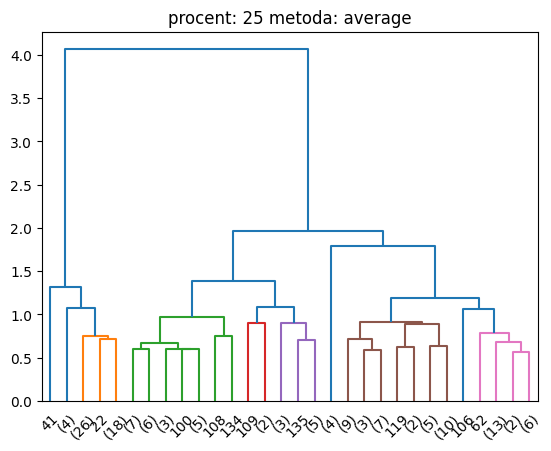

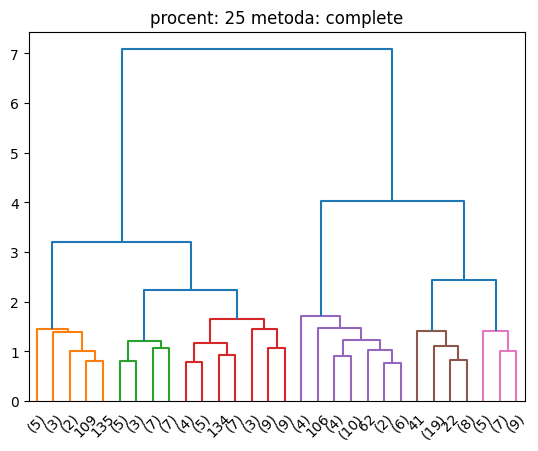

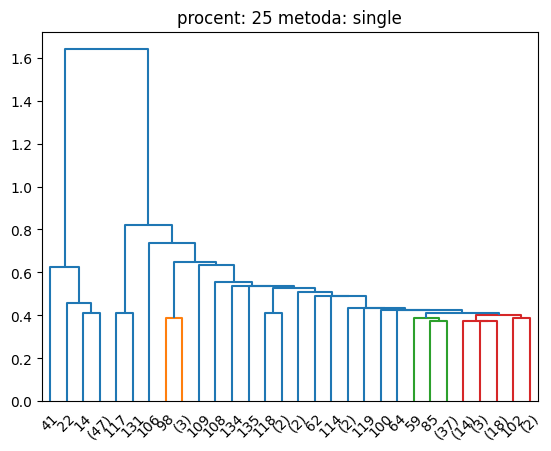

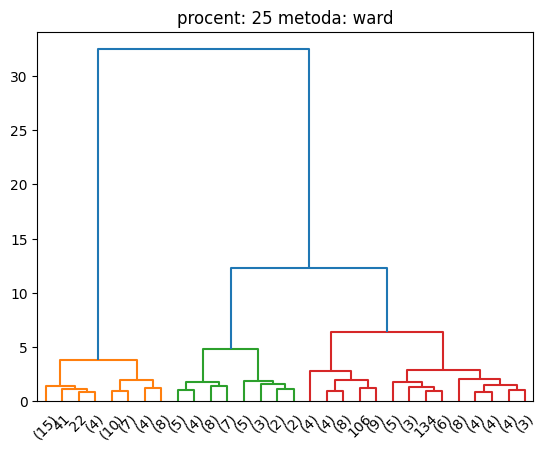

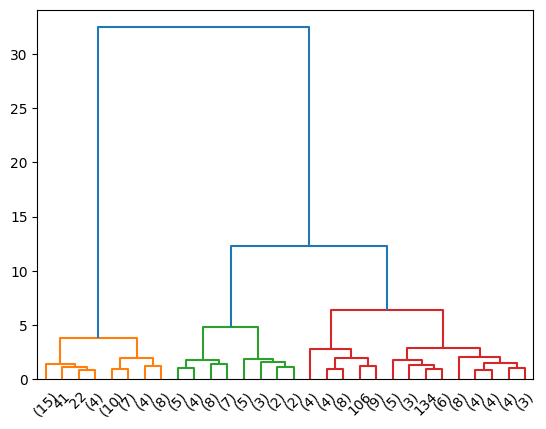

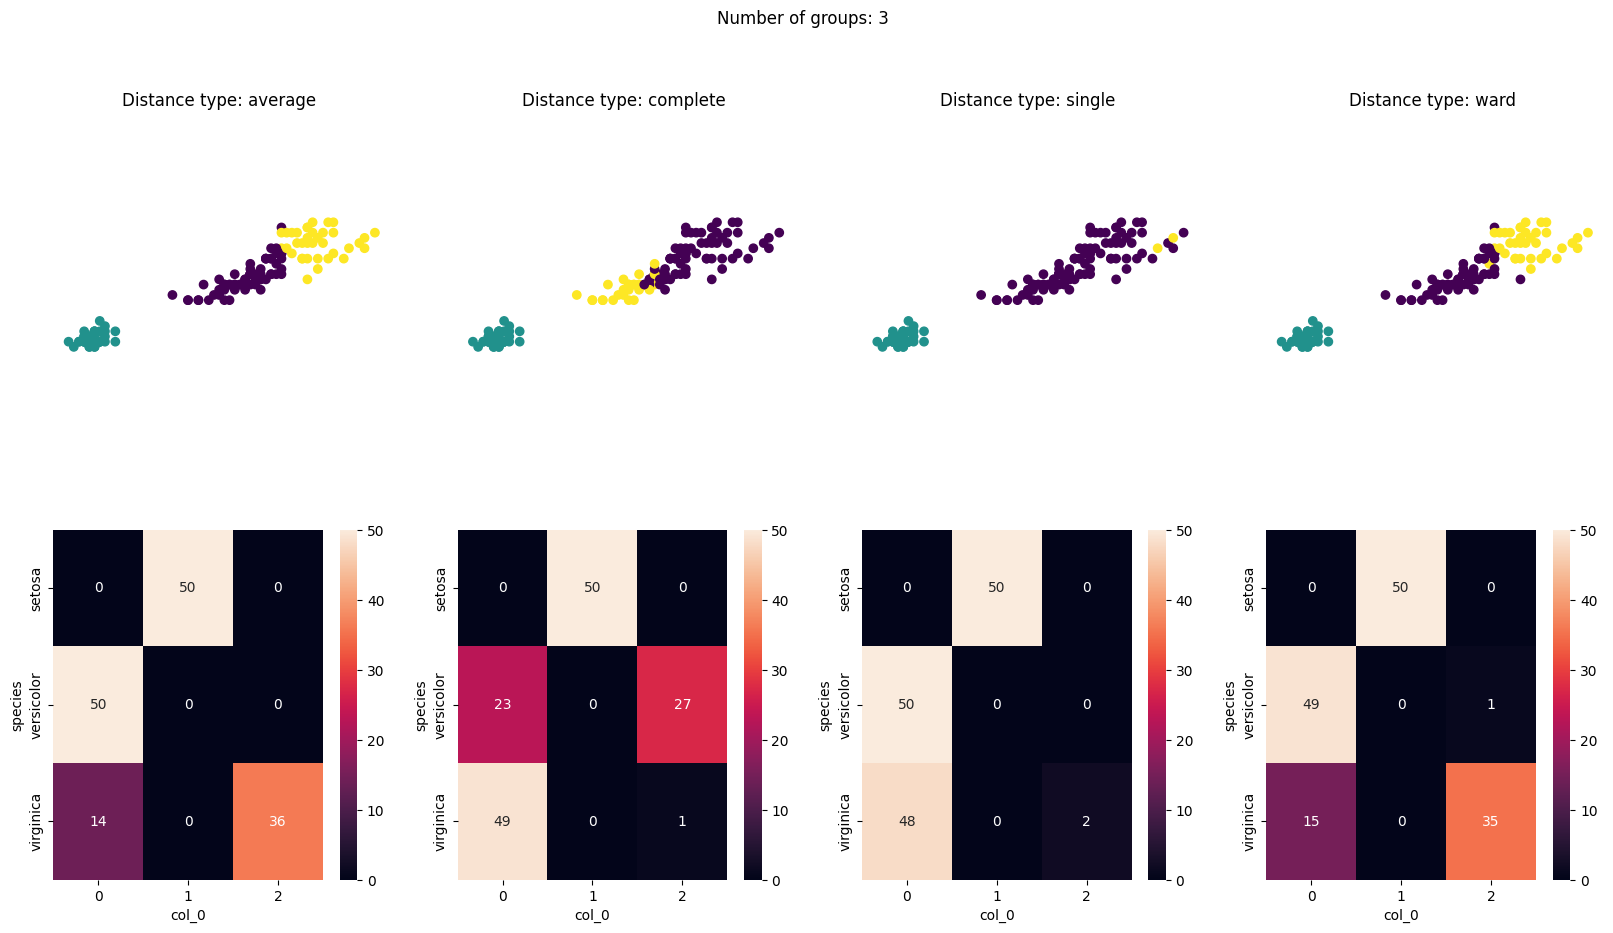

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

iris_org = pd.read_csv("iris.csv",usecols = range(1, 6))
iris = iris_org.drop(columns = "species")

# def aglo(df_org, classColumnName, attrColumnsNames, ile_grup, typ_odleglosci):
#     dft = df_org.drop(columns = [classColumnName])
#     for i,atrybut1 in enumerate(attrColumnsNames):
#         count = 1
#         plt.figure(figsize=(30,5))
#         for j,atrybut2 in enumerate(attrColumnsNames):
#             if atrybut1==atrybut2:
#                 continue
#             df = dft.loc[:,[atrybut1,atrybut2]]

#             plt.subplot(1,3*len(attrColumnsNames),count)
#             lables_legend = df_org[classColumnName].unique().tolist()
#             klasa = df_org[classColumnName].astype('category').cat.codes
#             sca = plt.scatter(x = df_org[atrybut1], y = df_org[atrybut2], marker = '.', c = klasa)
#             plt.legend(handles=sca.legend_elements()[0], labels = lables_legend)
#             plt.xlabel(atrybut1)
#             plt.ylabel(atrybut2)
#             plt.title('grupowanie oryginalne')
#             count+=1
            
#             plt.subplot(1,3*len(attrColumnsNames),count)
#             model = AgglomerativeClustering(linkage = typ_odleglosci, n_clusters = ile_grup)
#             model.fit(df)
#             sca = plt.scatter(df[atrybut1], df[atrybut2],marker = '.', c = model.labels_)
#             plt.legend(*sca.legend_elements())
#             plt.xlabel(atrybut1)
#             plt.ylabel(atrybut2)
#             plt.title('grupowanie aglomeracyjne:'+typ_odleglosci+", grup:"+str(ile_grup))
#             count+=1
            
#             df['grupa'] = model.labels_
#             plt.subplot(1,3*len(attrColumnsNames),count)
#             pomylki = pd.crosstab(df_org[classColumnName],df['grupa'])
#             sns.heatmap(pomylki,annot = pomylki)
#             plt.title('macierz pomyłek')
#             count+=1
            
            
            
iris_org = pd.read_csv("iris.csv", usecols = range(1, 6))
iris = iris_org.drop(columns = "species")

methods = ['average', 'complete', 'single', 'ward']
percent = 25

#analiza dendrogramu, zmienialem wartosci procentow
for method in methods:
    group = linkage(iris, method = method, metric = 'euclidean')
    p = percent * max(group[:, 2]) / 100
    dendrogram(group, truncate_mode = 'lastp', color_threshold = p)
    plt.title("procent: "+str(percent)+" metoda: "+method)
    plt.show()

#liczba grup po przeanalizowaniu dendrogramow
ngroups = 3

group = ward(iris)
condition = percent * max(group[:, 2]) / 100
dendrogram(group, truncate_mode = 'lastp', color_threshold = condition)

plt.figure(figsize = (20, 10))
for i, dist_type in enumerate(('average', 'complete', 'single', 'ward')):
    plt.subplot(2,4, i + 1)
    model = AgglomerativeClustering(linkage = dist_type, n_clusters = ngroups)
    model.fit(iris)
    plt.scatter(iris.petal_length,iris.petal_width, c = model.labels_)
    plt.title('Distance type: %s ' % dist_type, fontdict = dict(verticalalignment = 'top'))
    plt.axis('equal')
    plt.axis('off')
    plt.suptitle('Number of groups: %i' % ngroups)
    plt.subplot(2, 4, i + 5)
    errors = pd.crosstab(iris_org['species'],model.labels_)
    sns.heatmap(errors, annot = errors)


Wnioski z analizy wyników:
* Testowałem dendrogramy dla różnych wartości procentowych(15,25,45,65,85) i nalepszy wynik uznalem dla warotsci 25, metody ward, ktory sugerowal podazial na 3 grupy 
* Najlepszym typem odległości jest complete lub ward
* Najgorszy jest single, ponieważ wtedy virginica i versicolor staja sie jedna klasa
* Macierz błedów często jest inna niż spozdziwena "true positives" nie sa na diagonali, ze wzgledu na dobor punktu startowego centroidow ,czesto kolejnosc grup nie odpowiada kolejnosci gatunkow w zbiorze oryginalnym. Jednak duze, wieksze wartosci w pojedynczych komorkach sugeruja ze sa to "true positoves" dla danego rodzaju. 


> Grupowanie danych zbioru `iris` metodą k-średnich. Określenie optymalnych paramterow grupowania  (liczba grup, typ odległości). Określenie metodami (łokciową i sylwetki) jakia jest dla optymalna liczba grup.

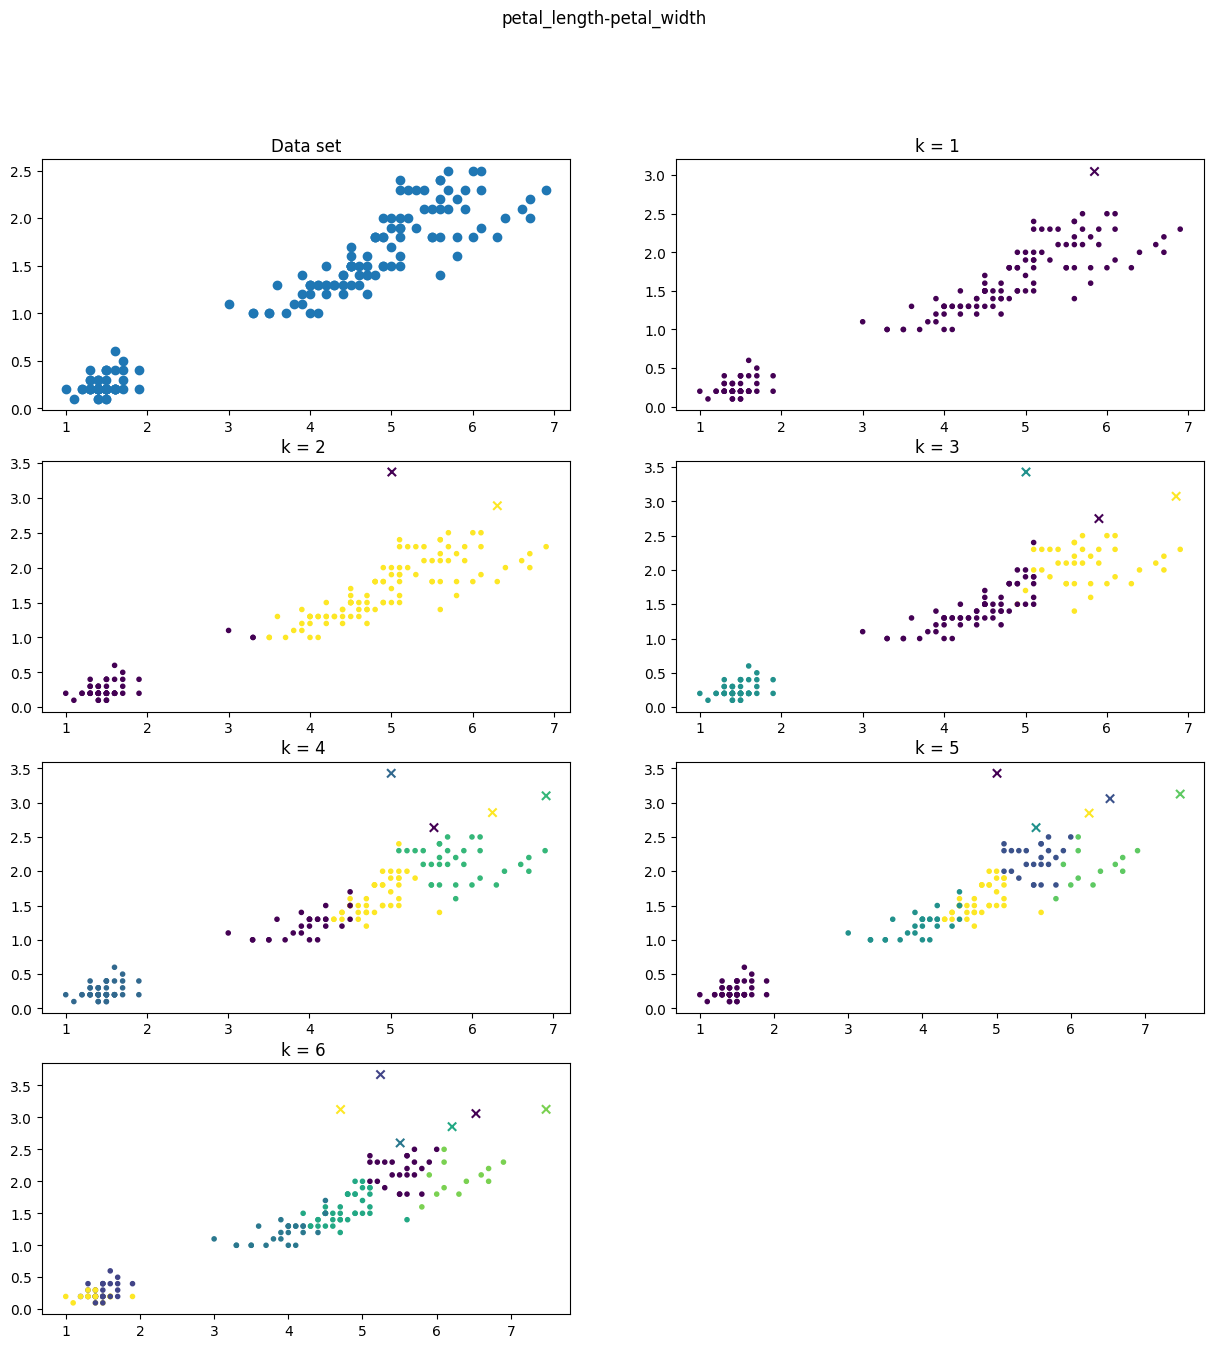

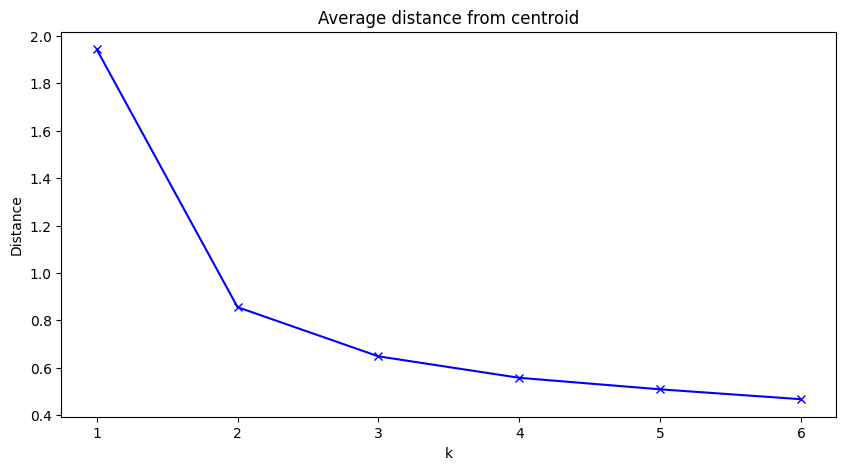

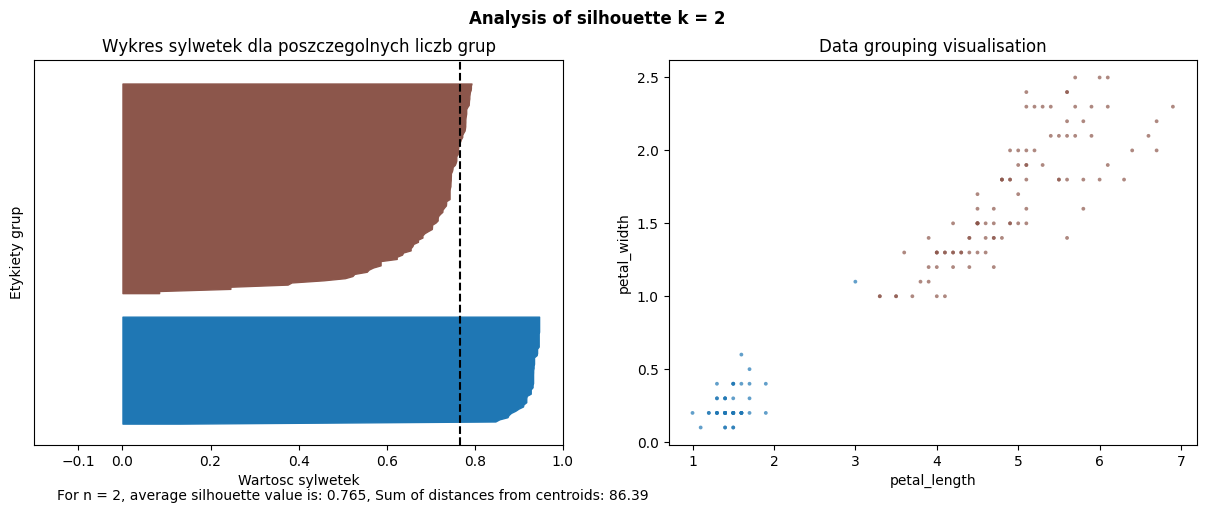

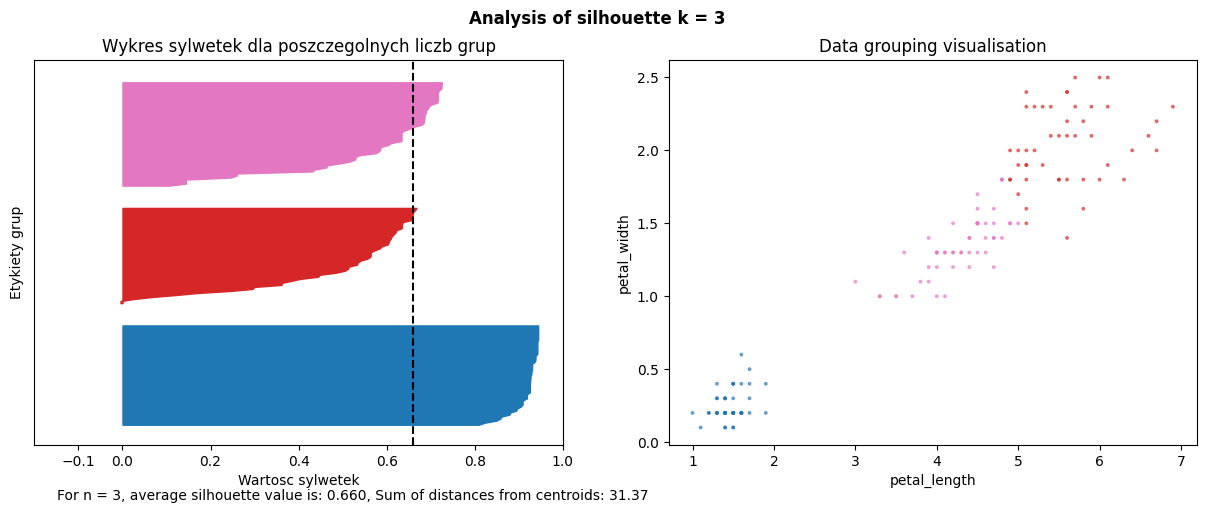

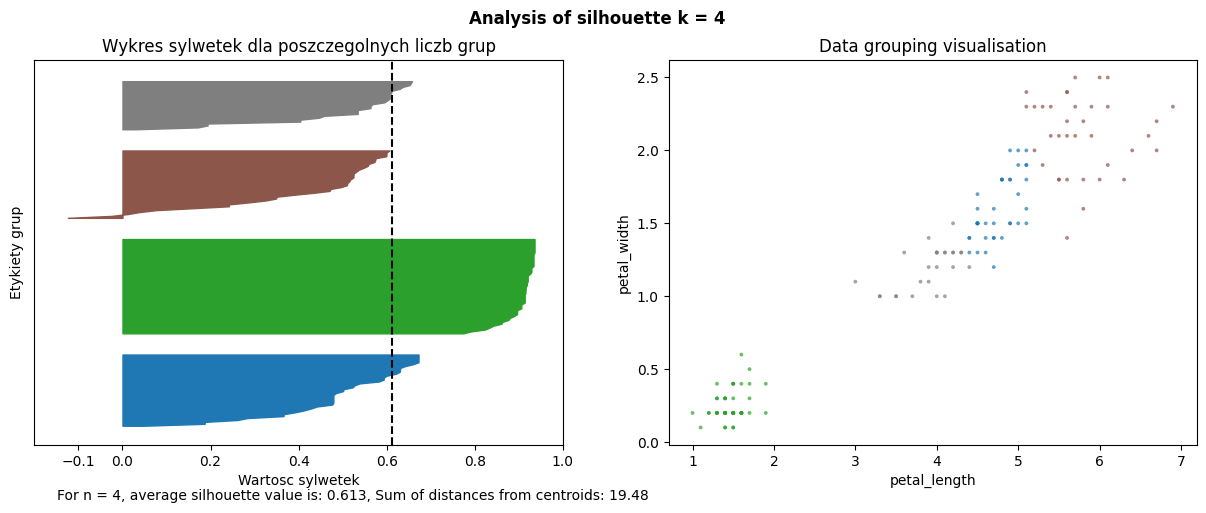

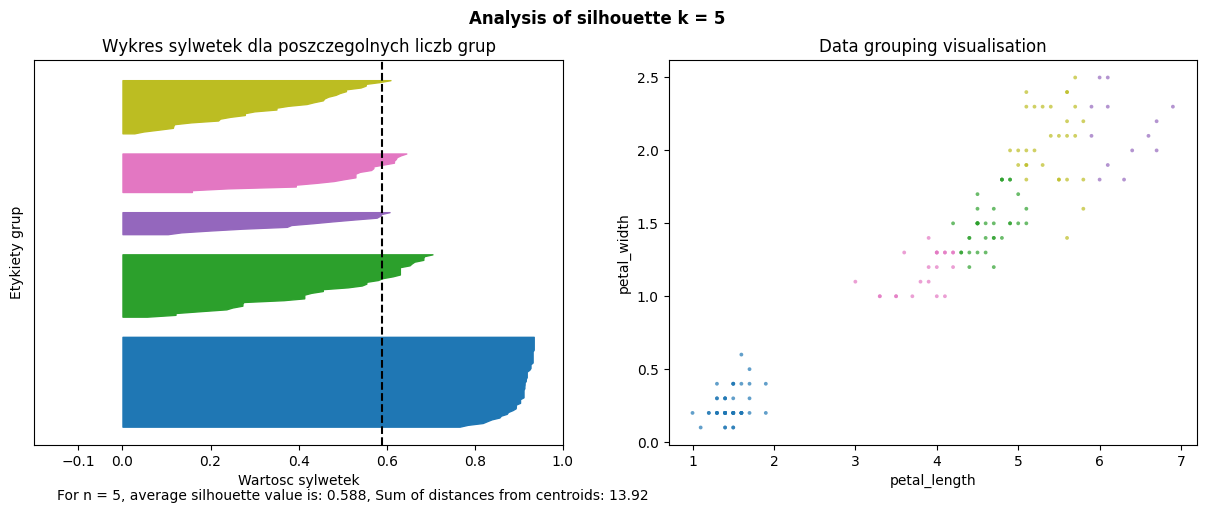

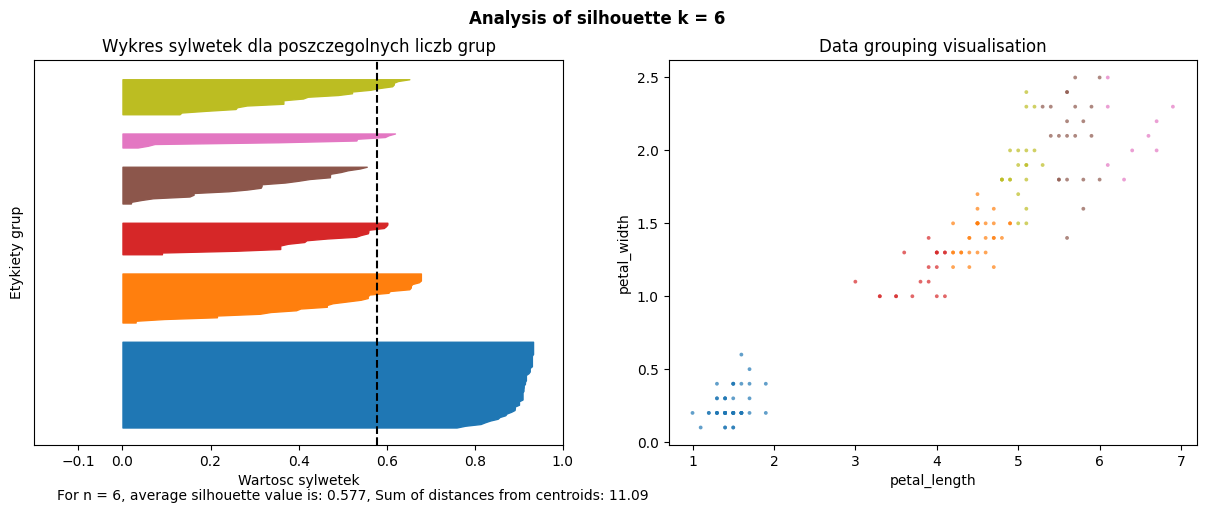

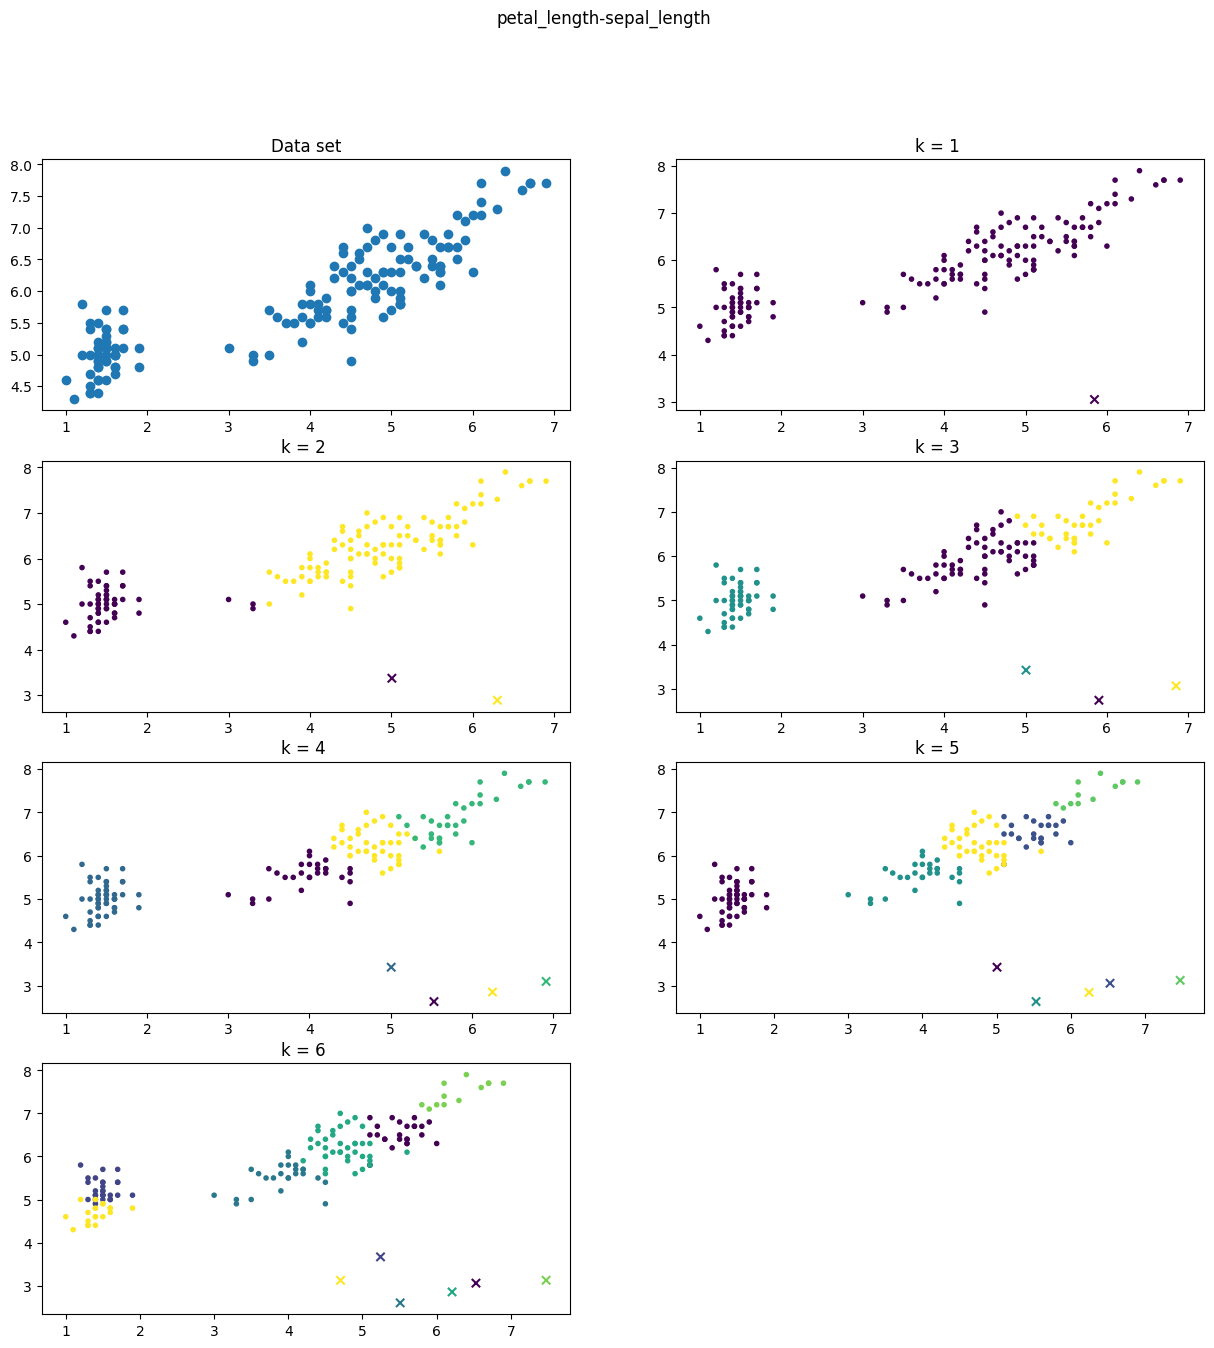

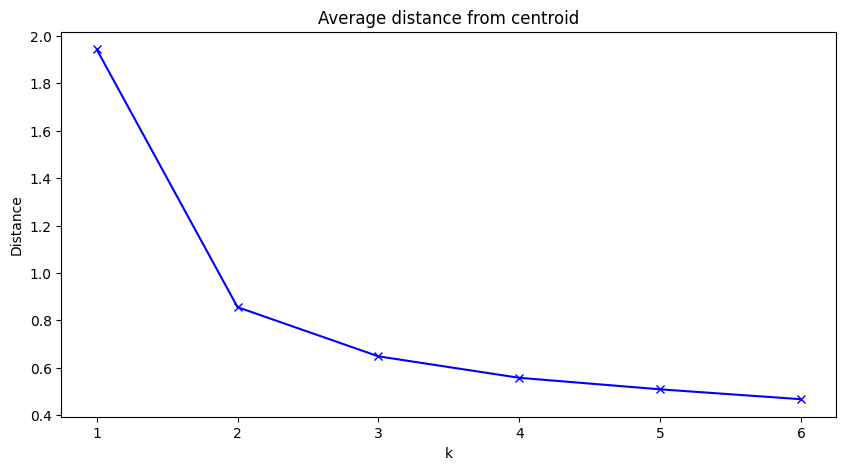

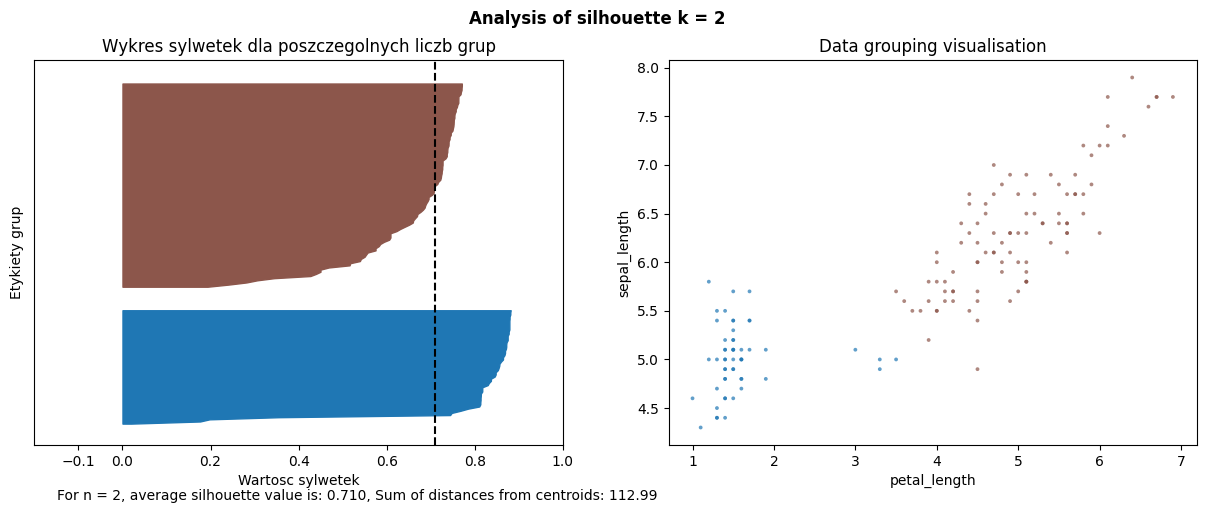

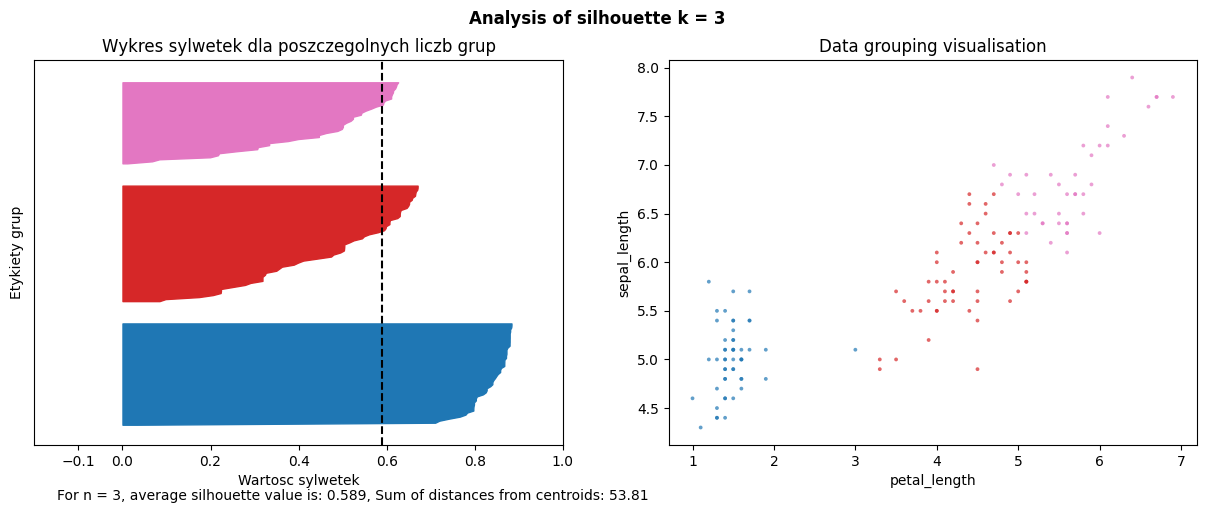

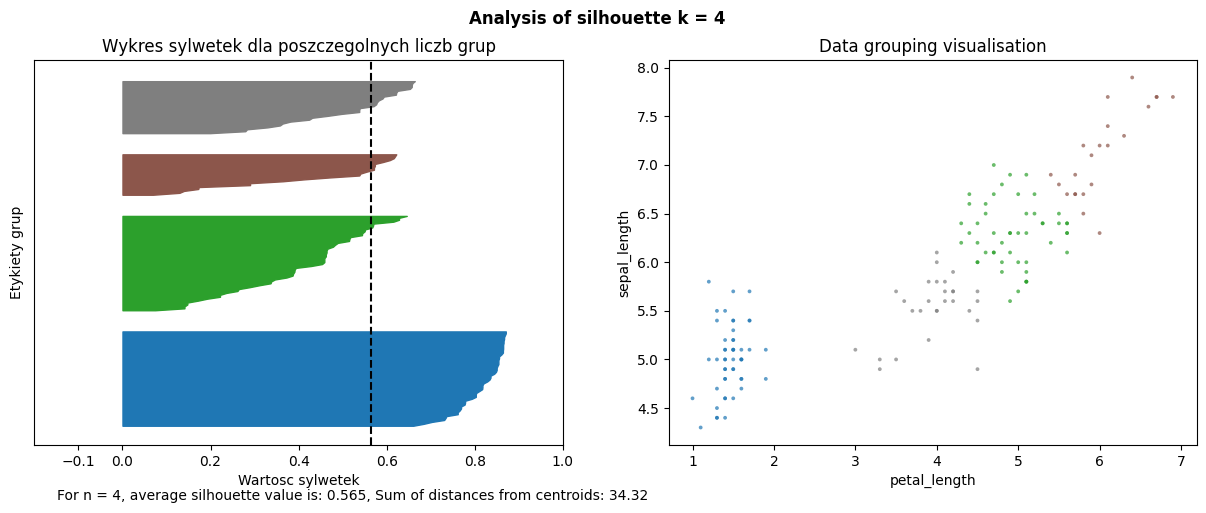

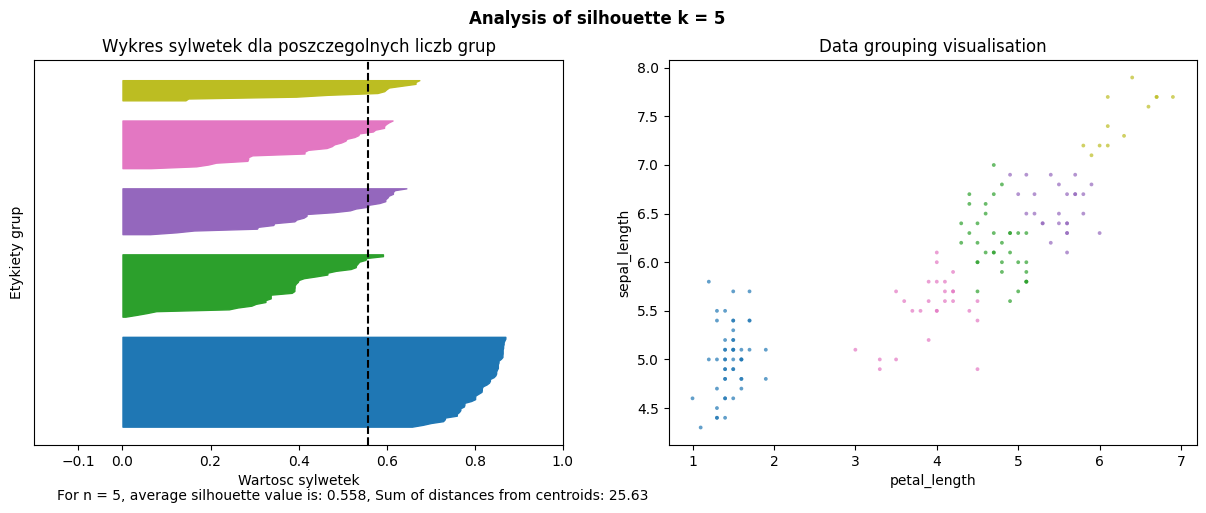

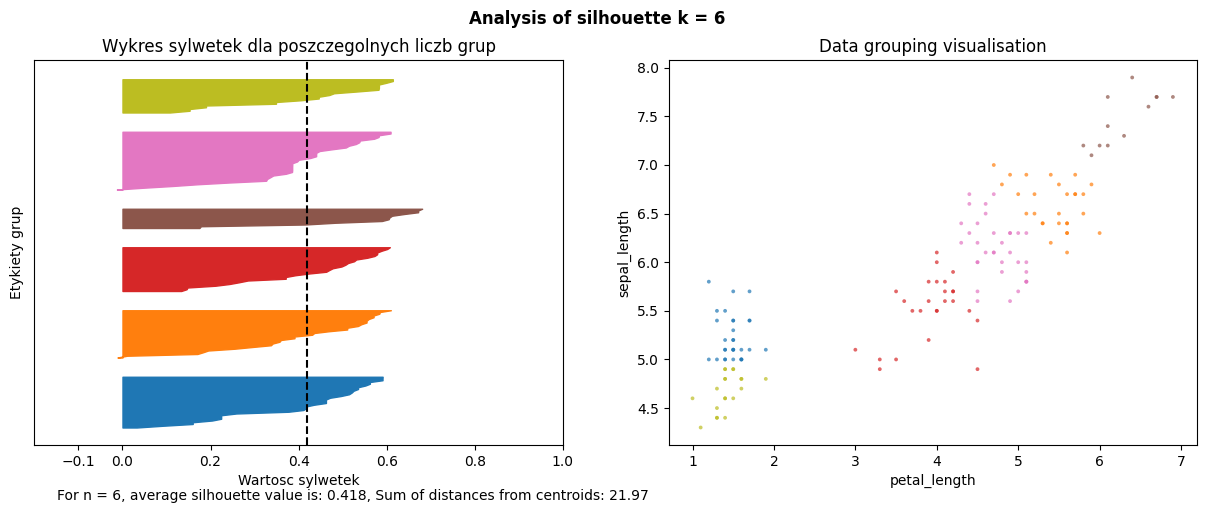

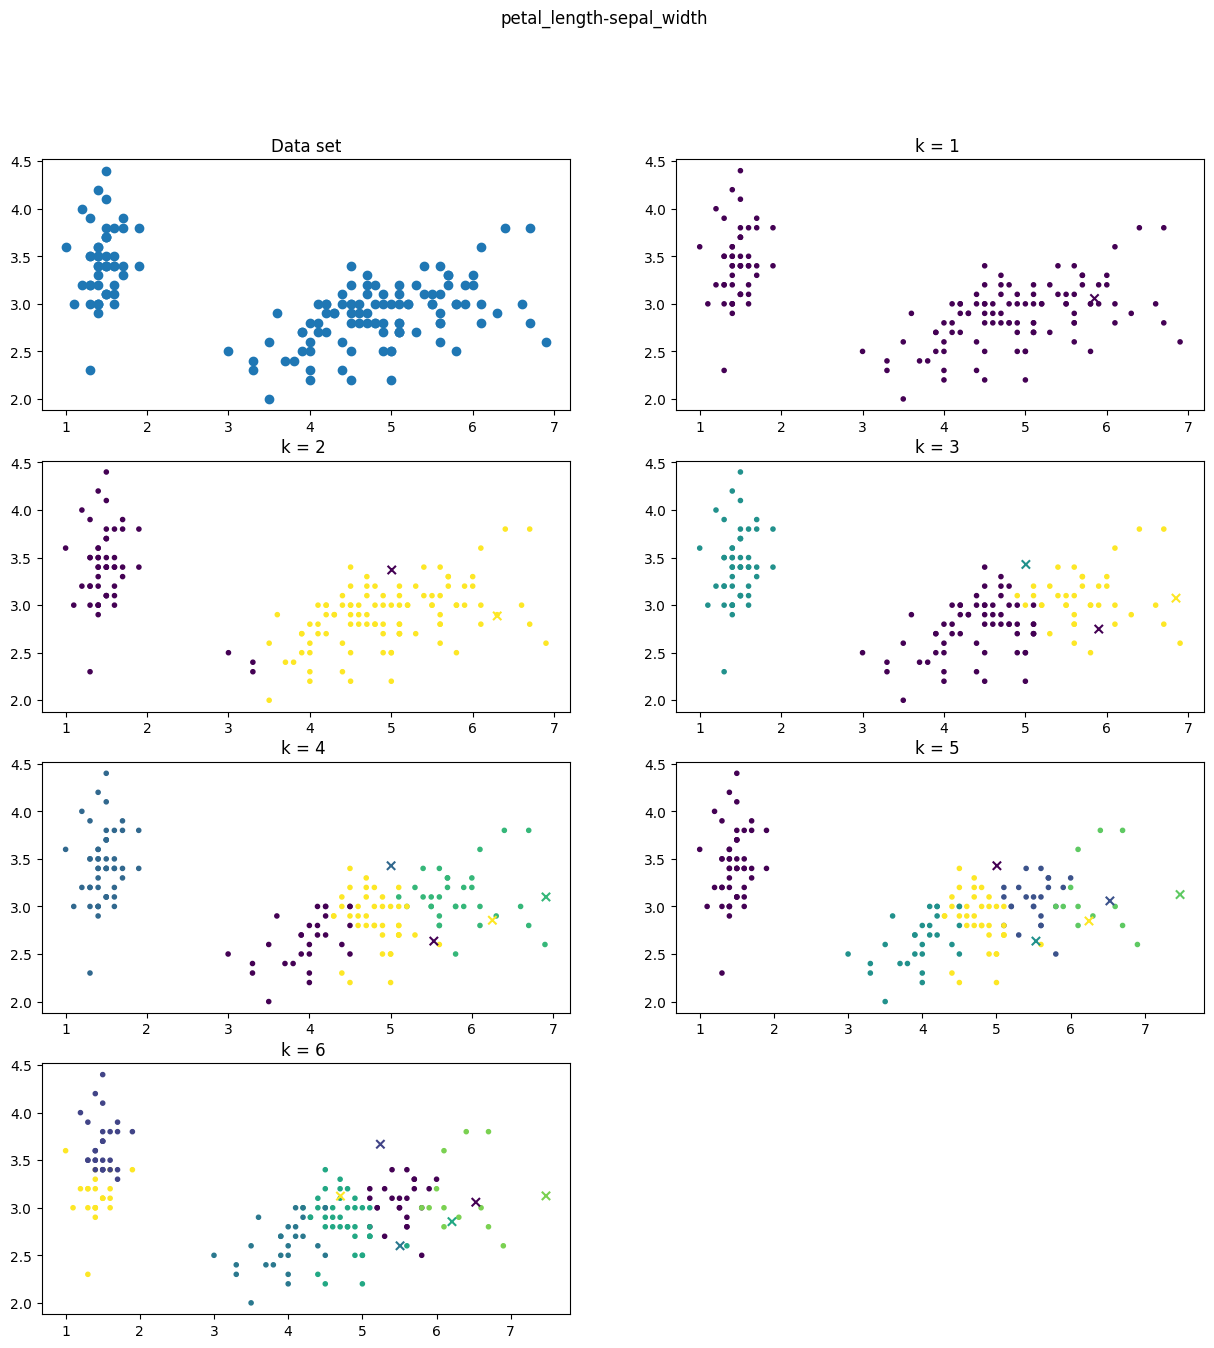

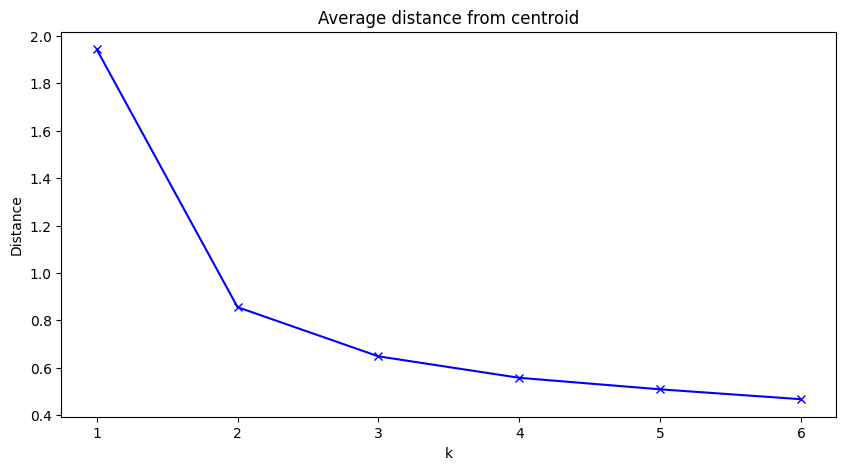

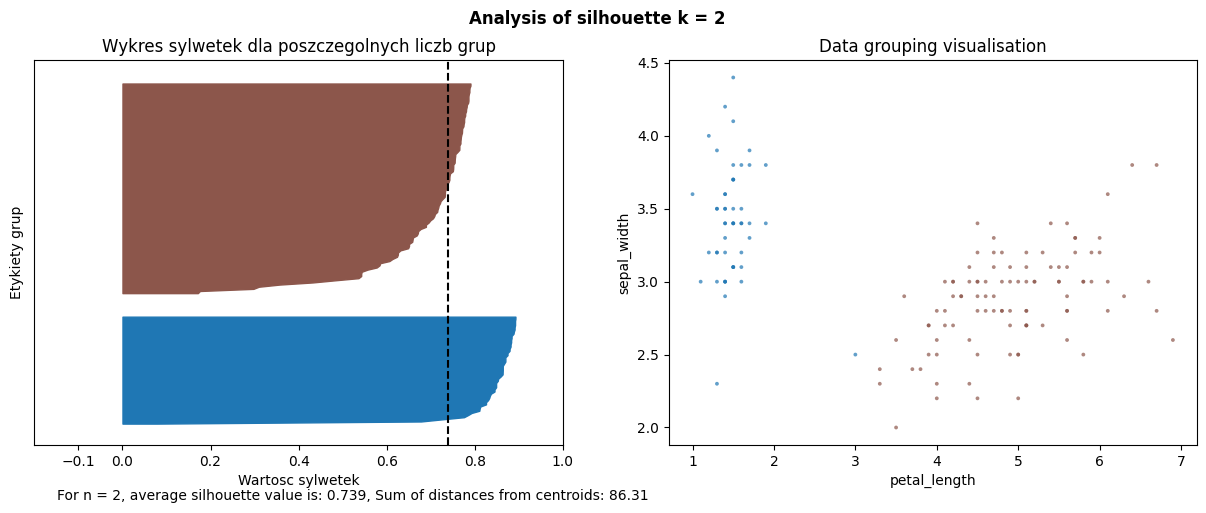

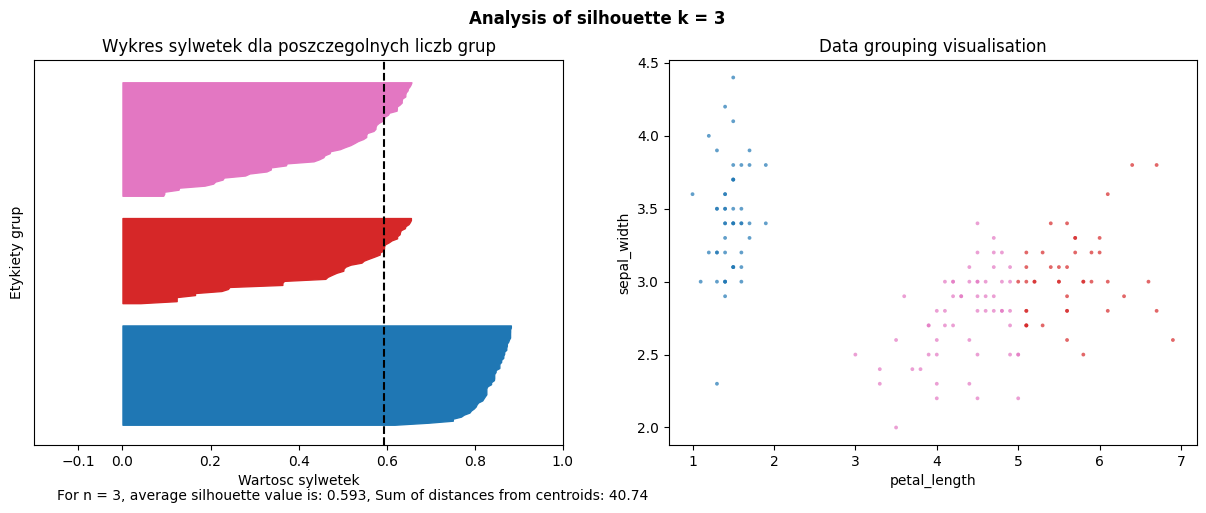

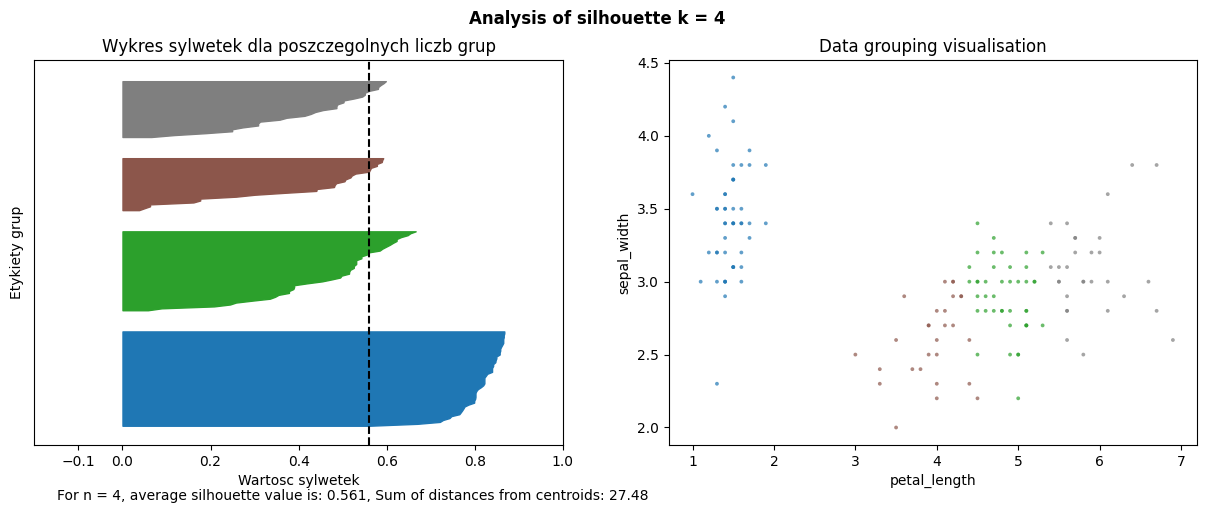

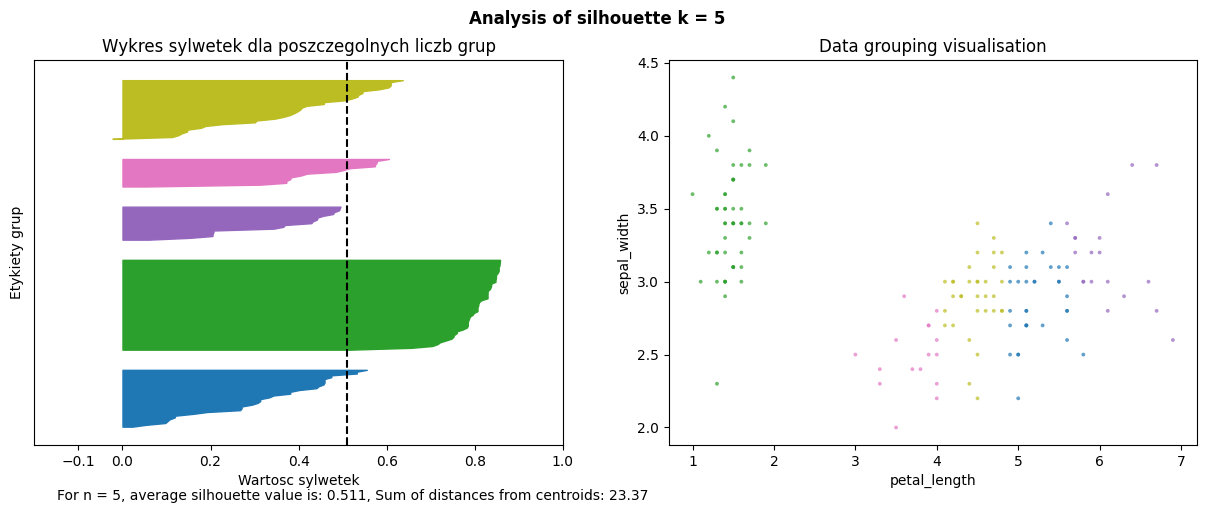

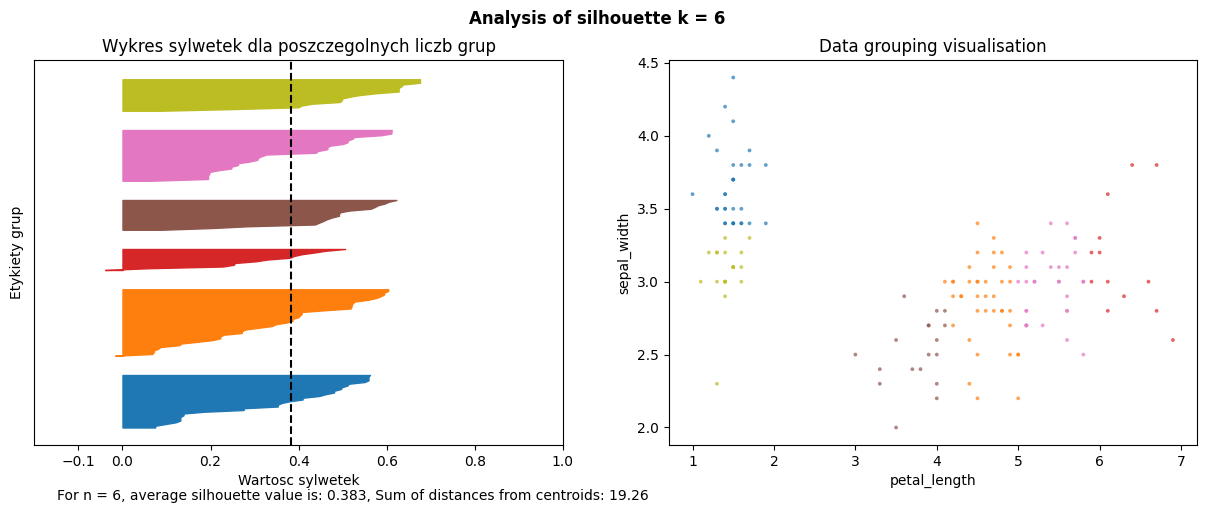

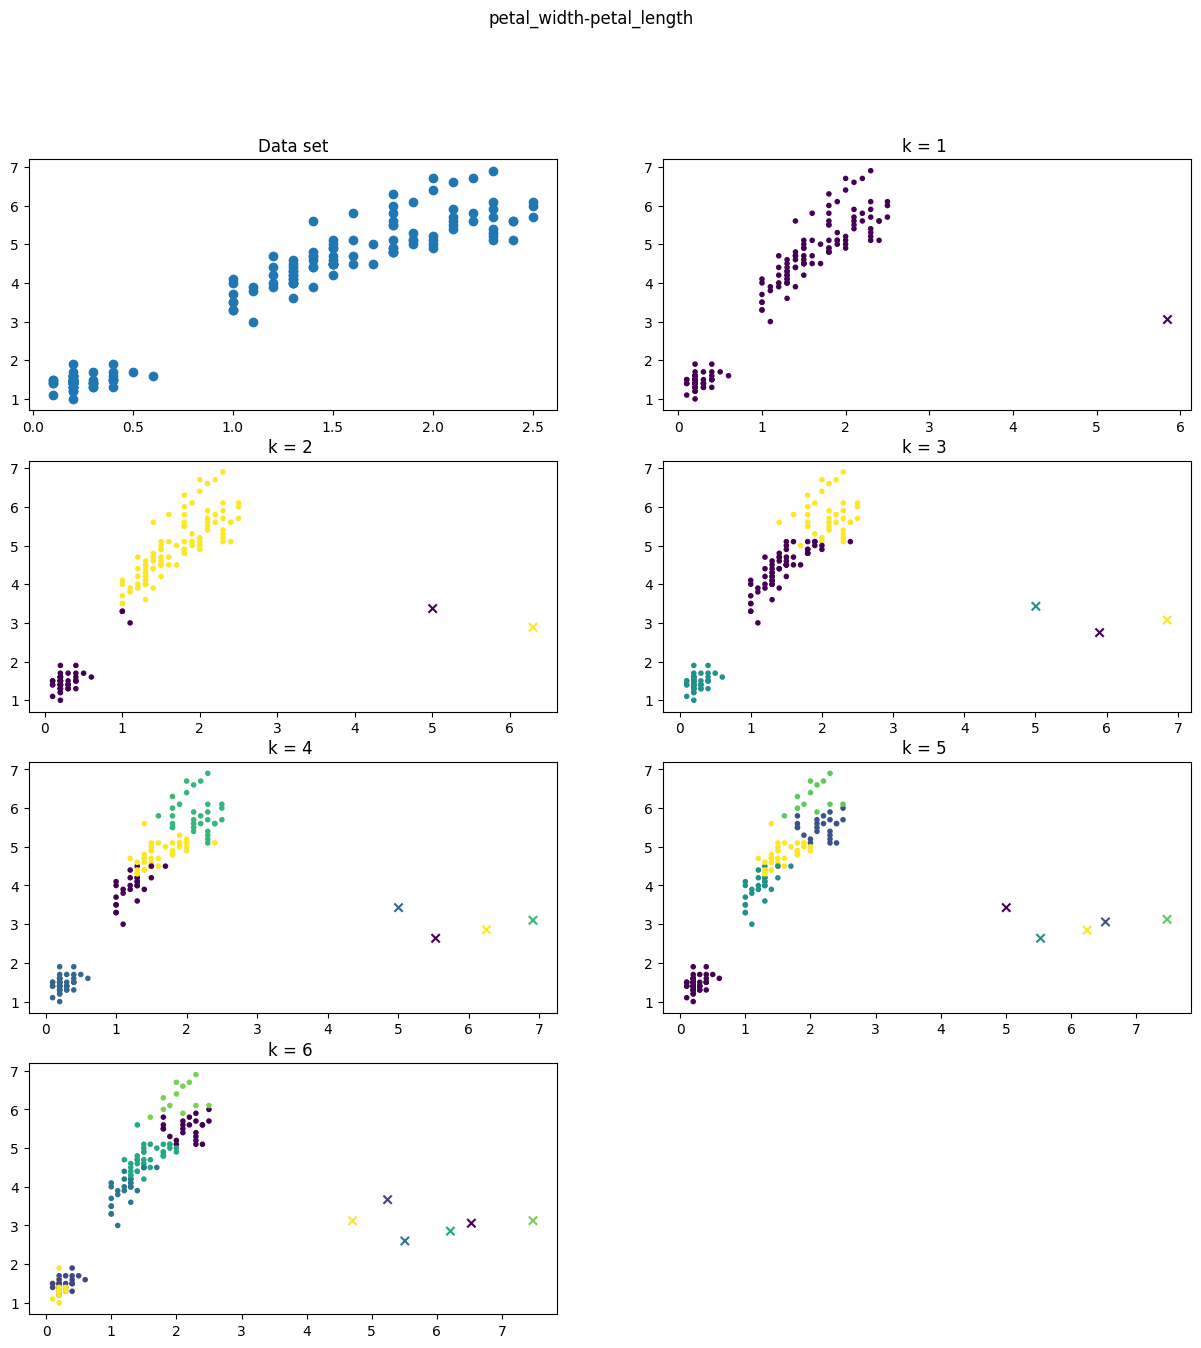

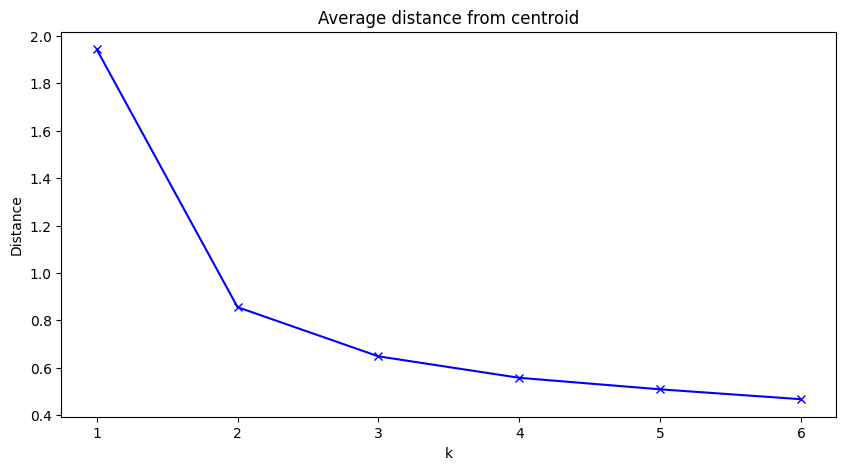

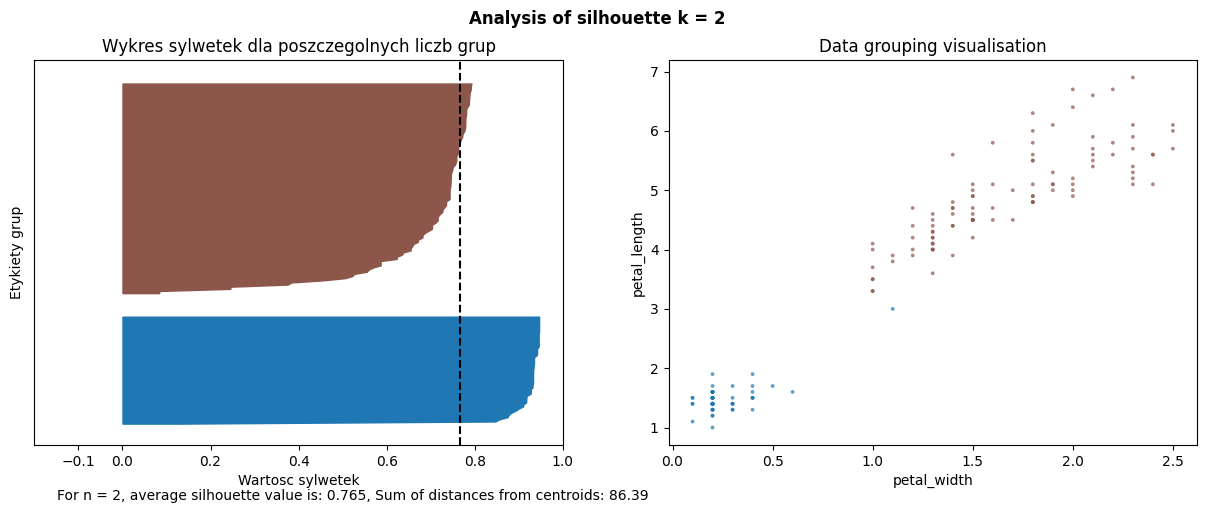

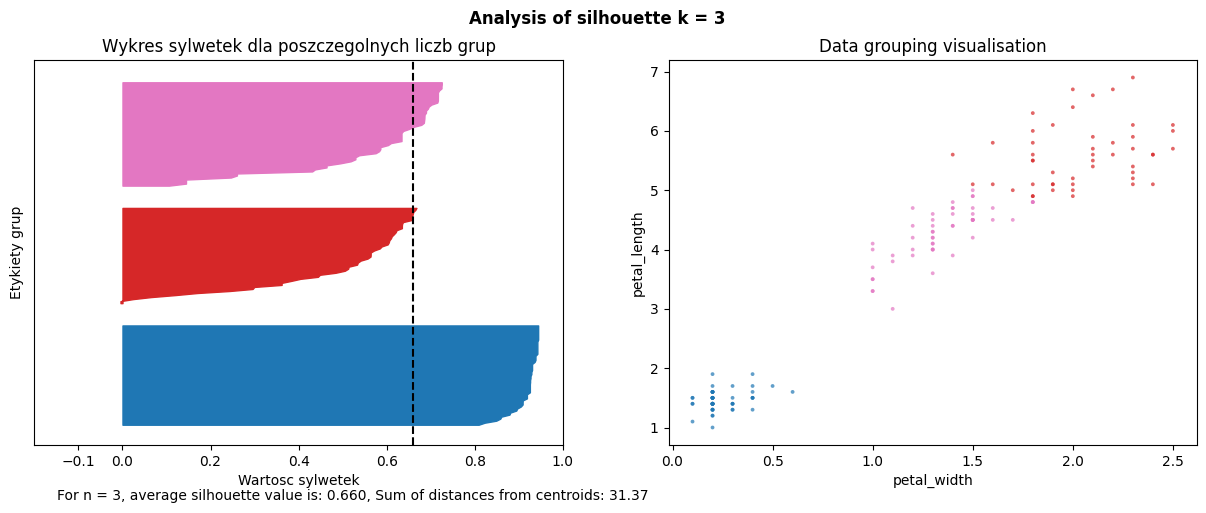

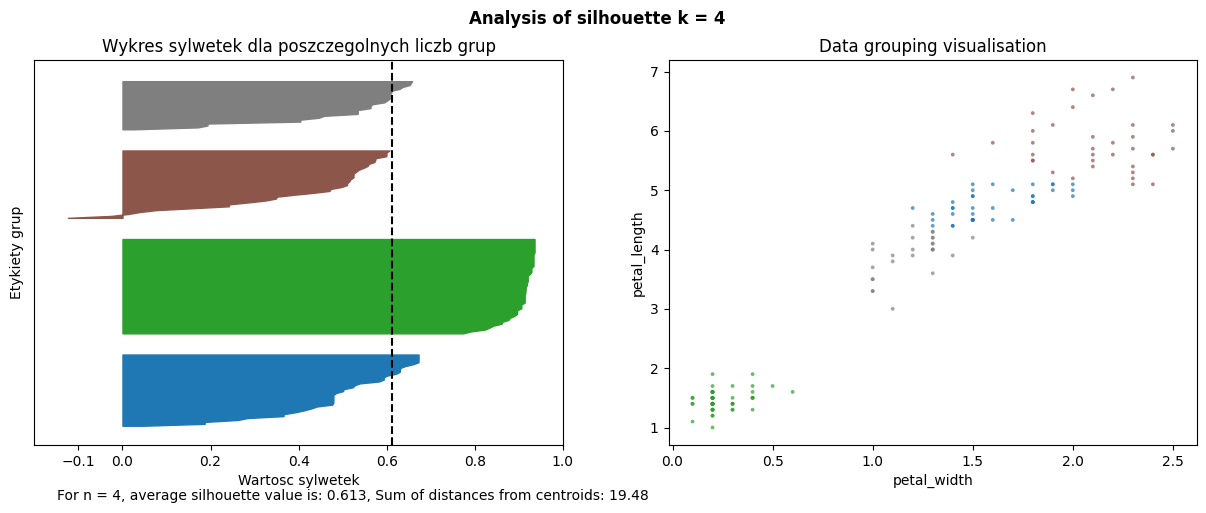

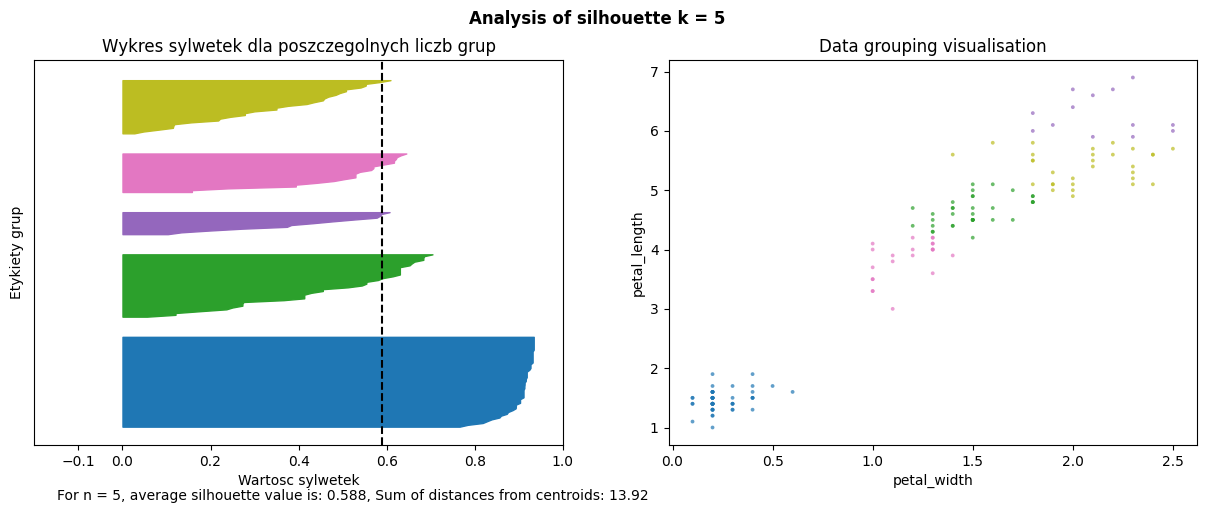

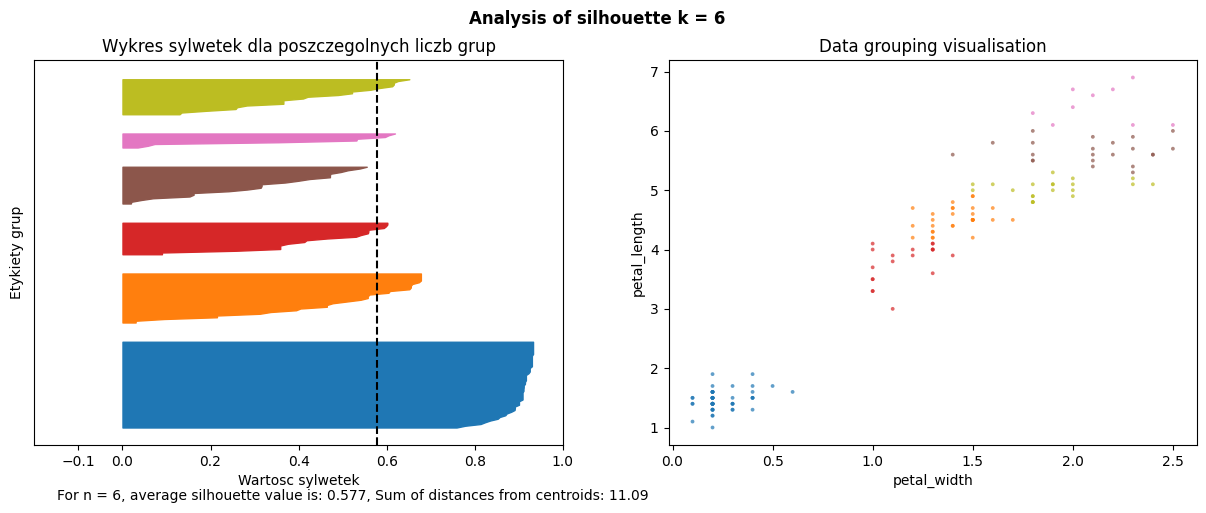

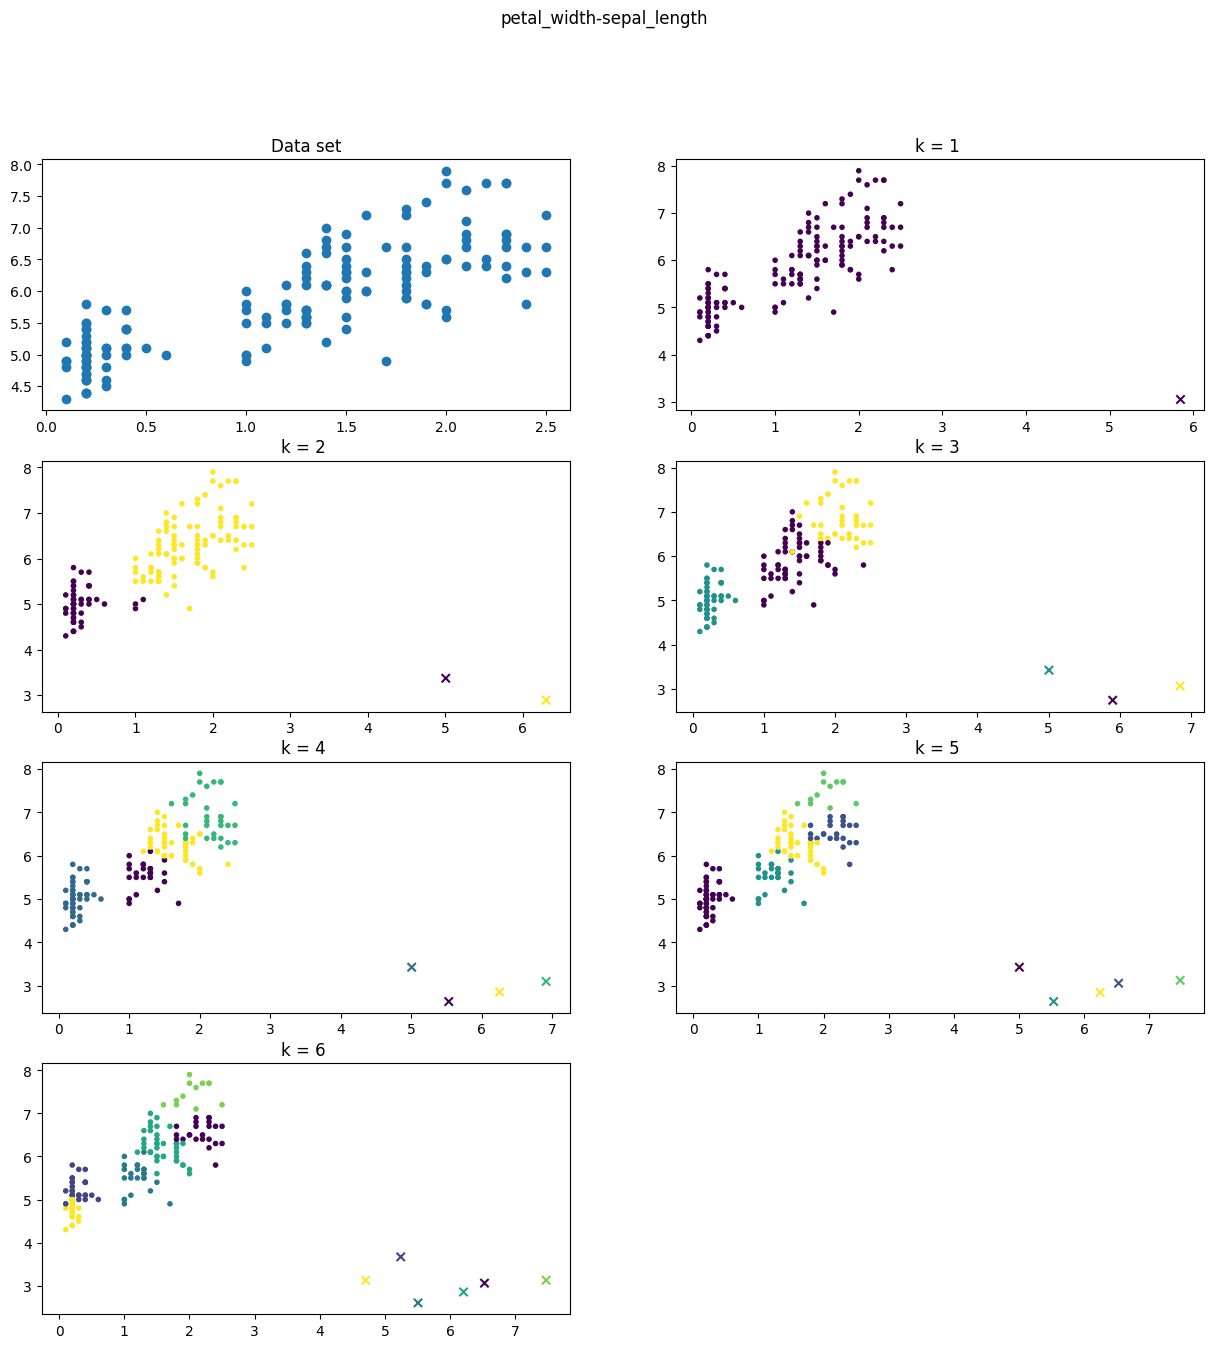

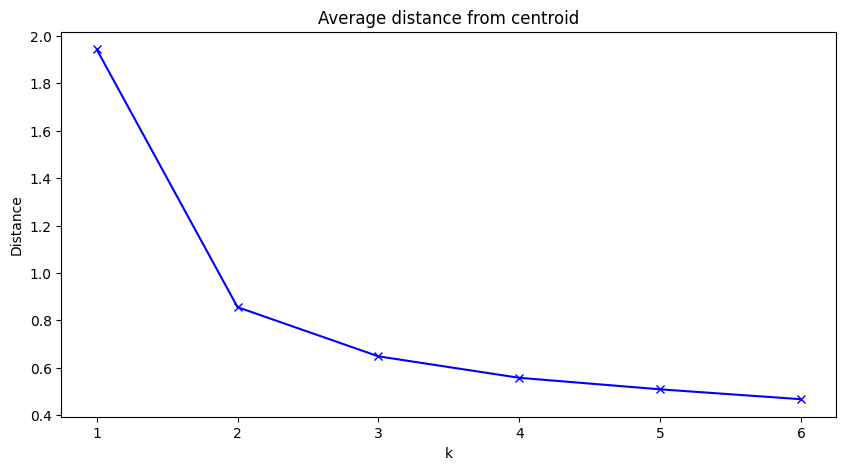

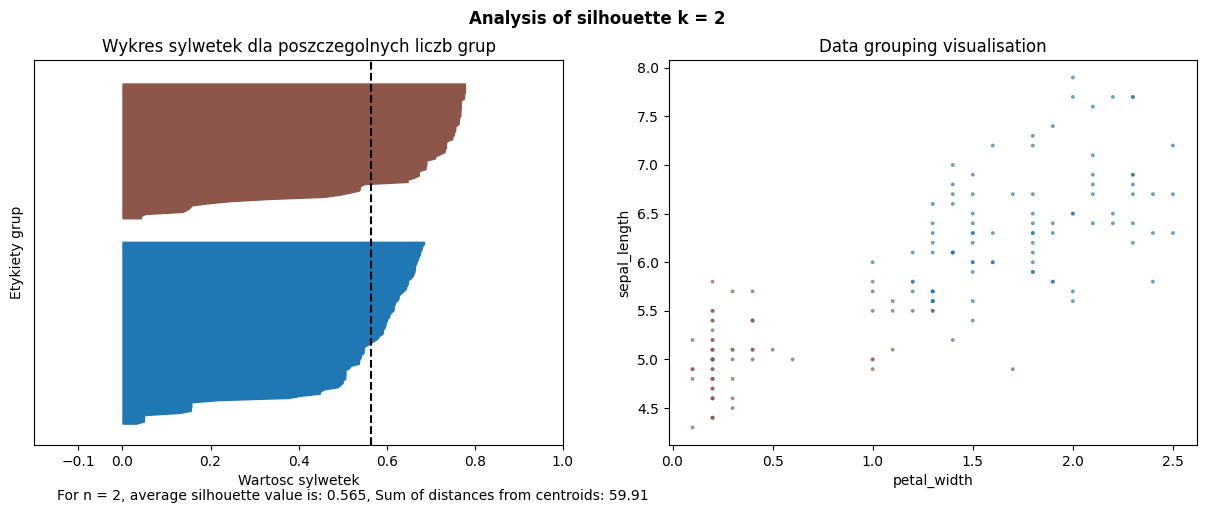

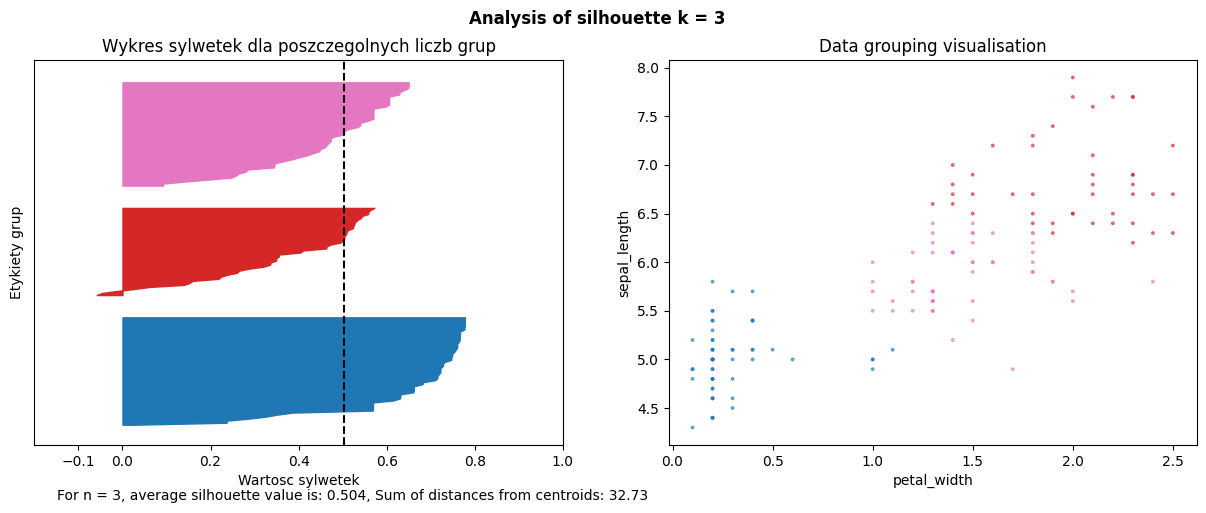

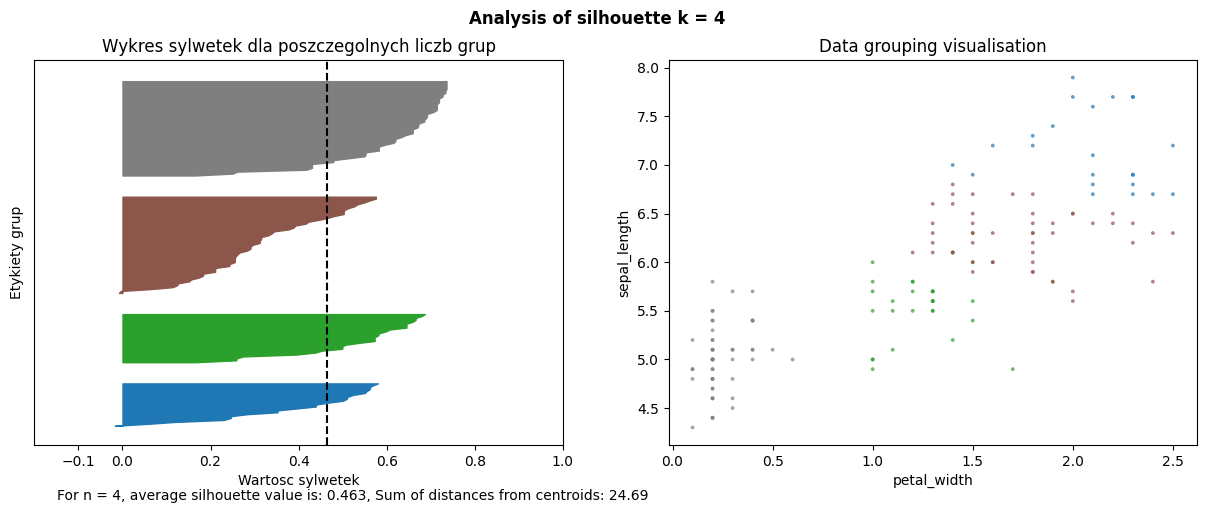

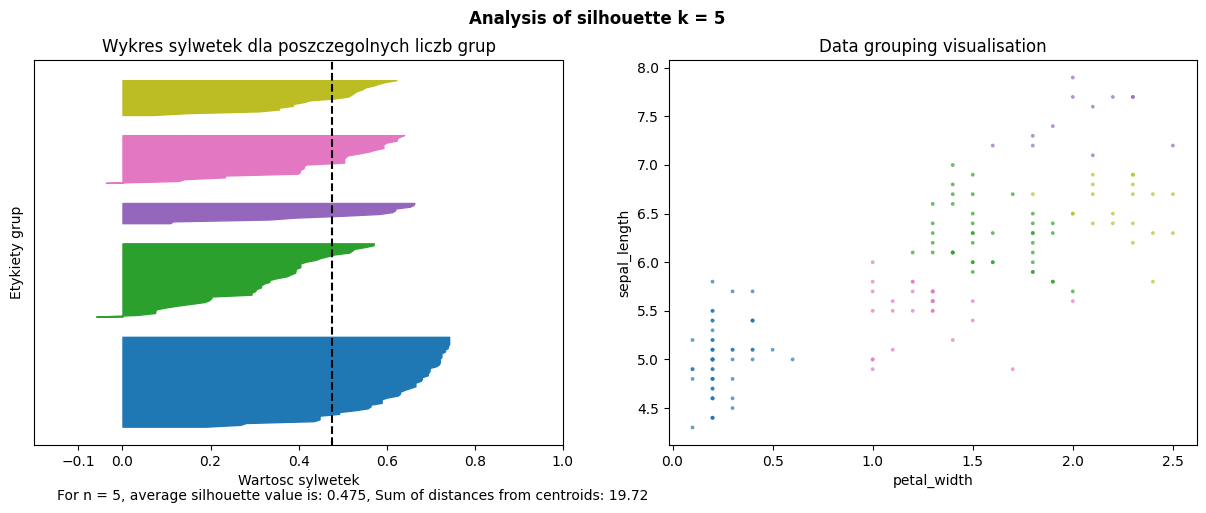

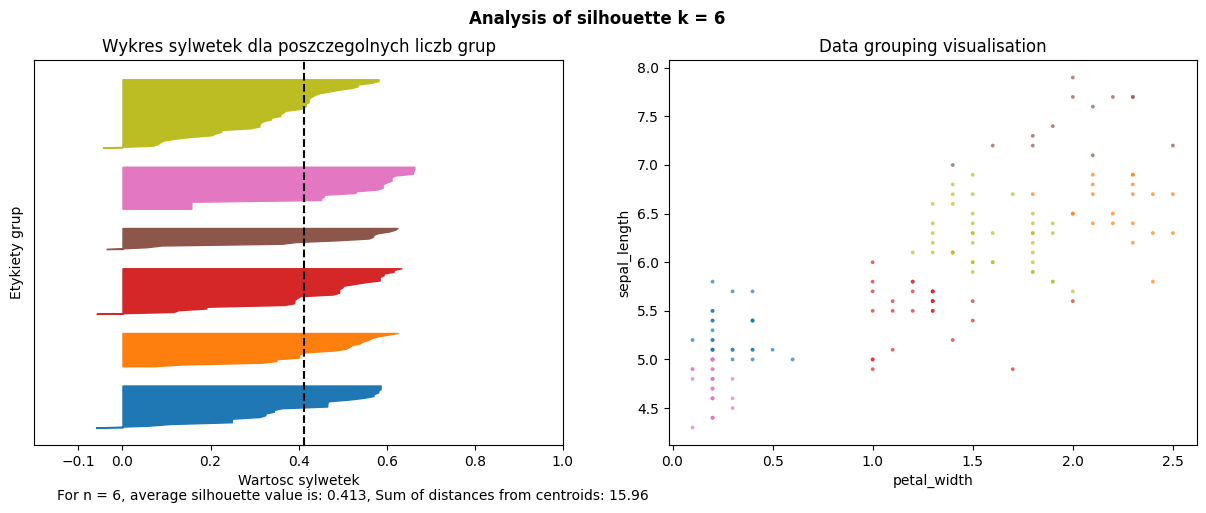

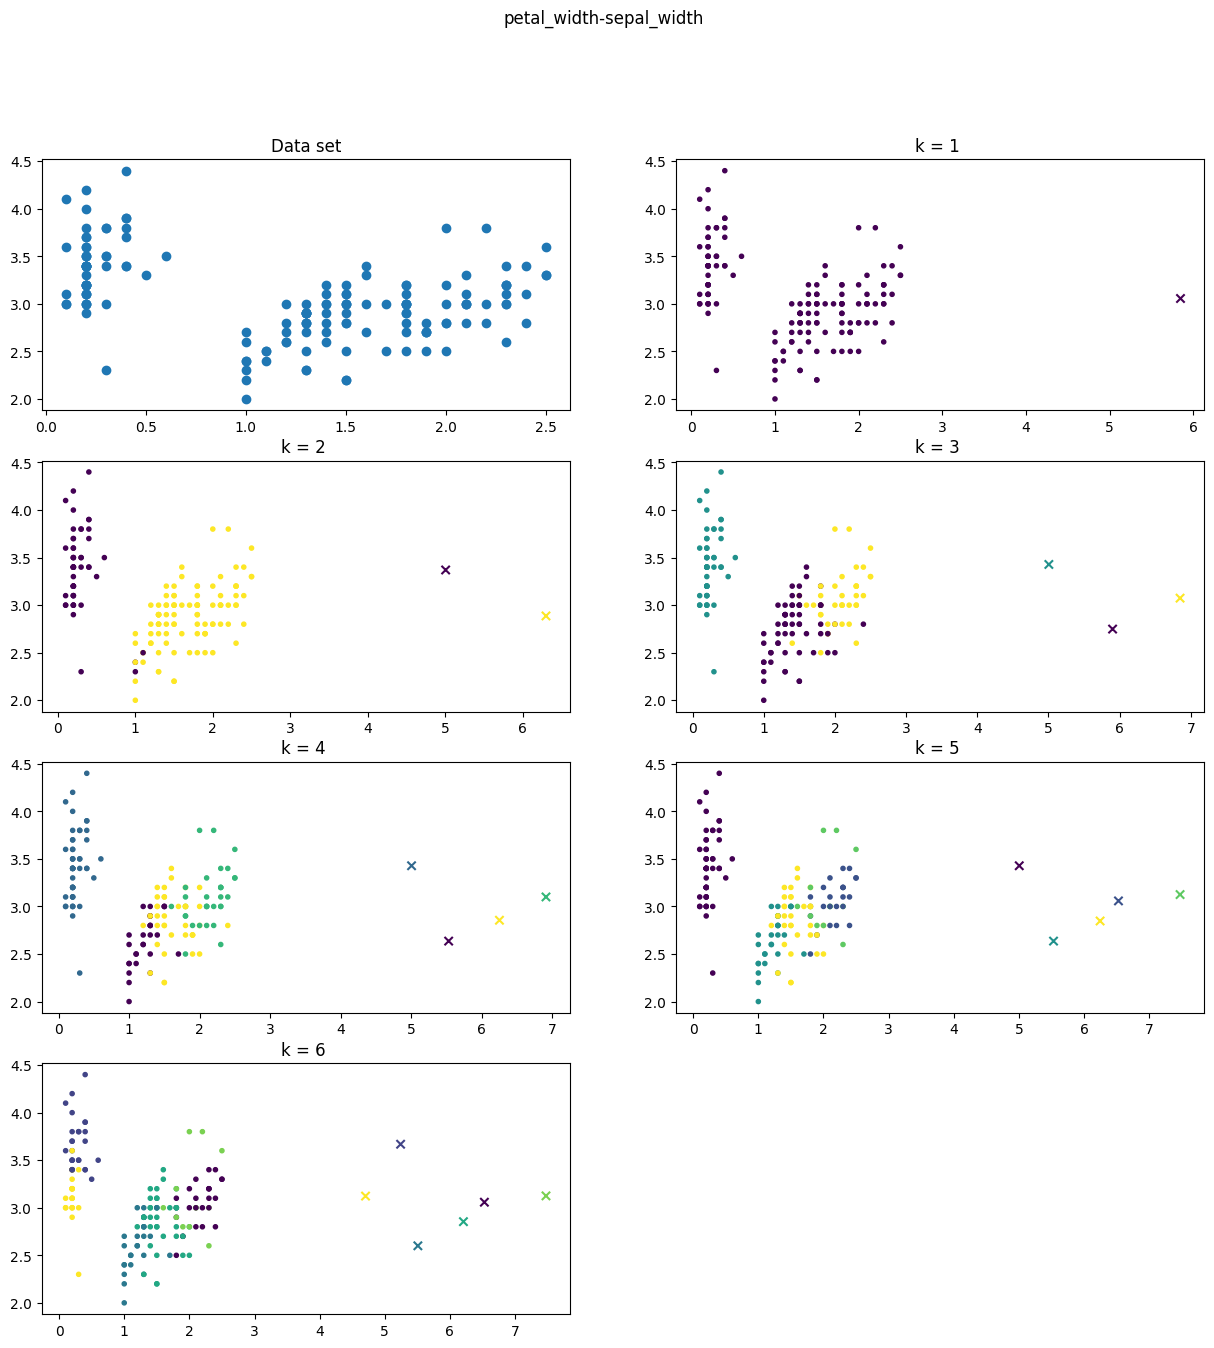

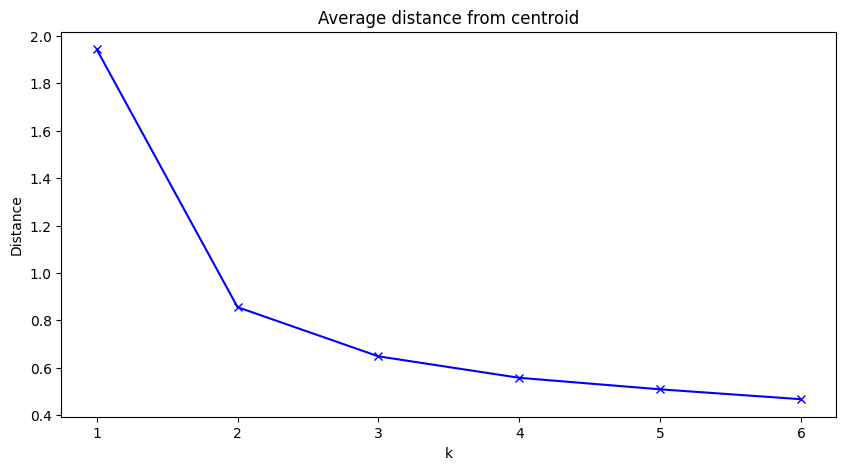

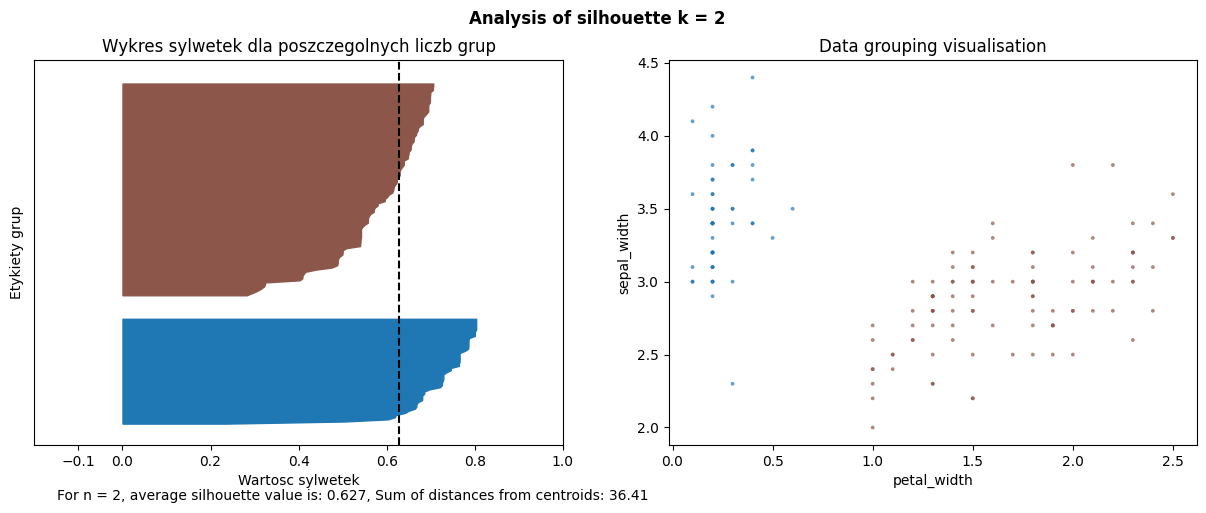

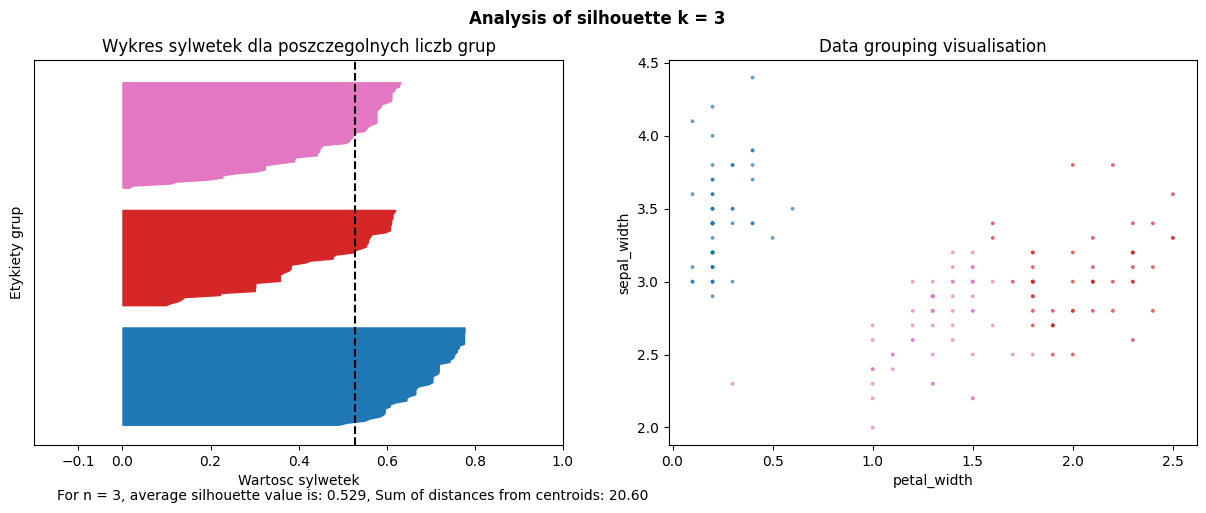

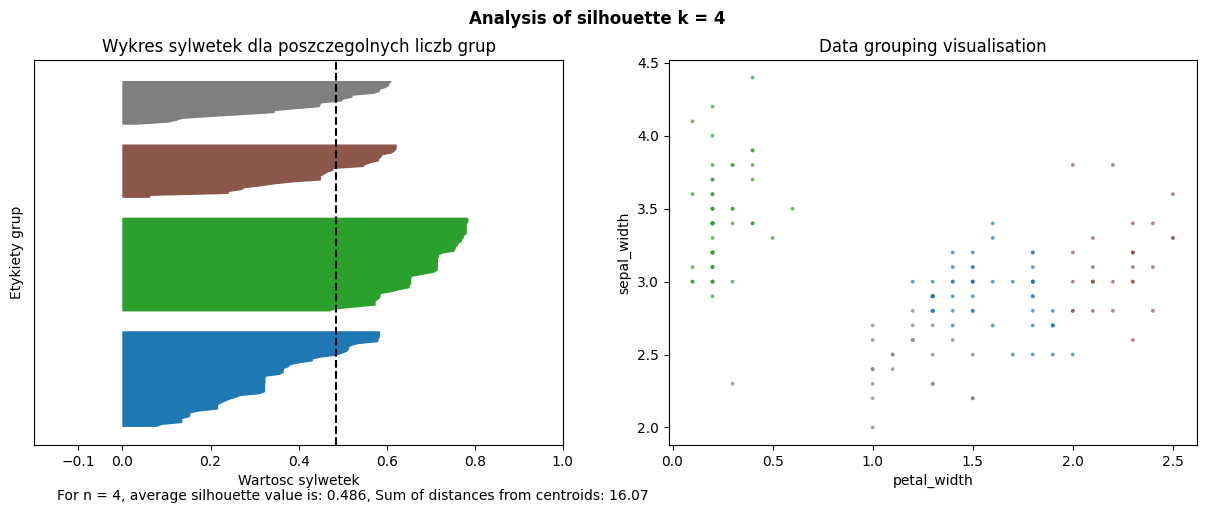

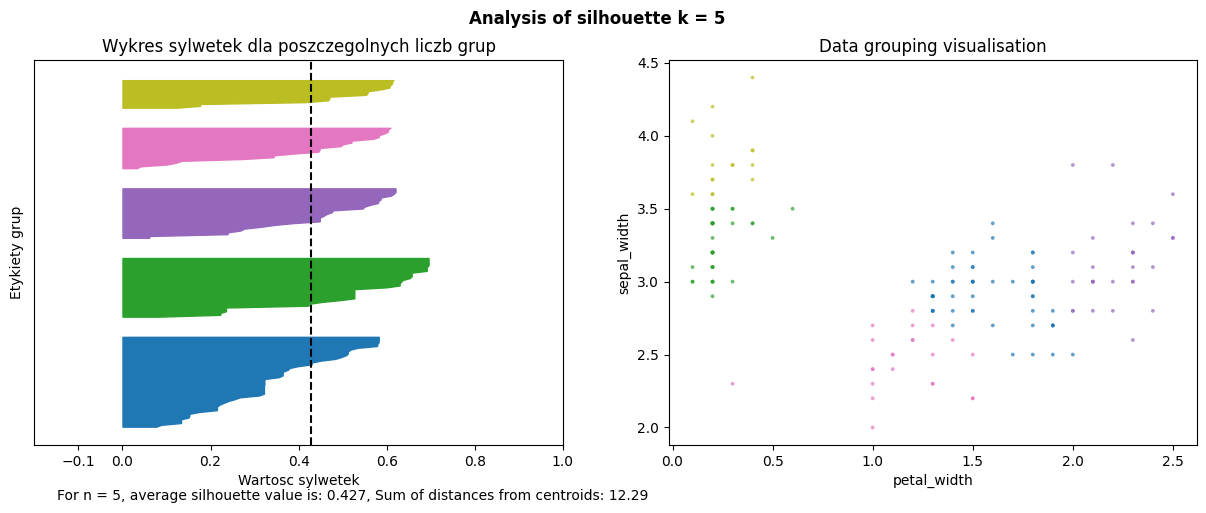

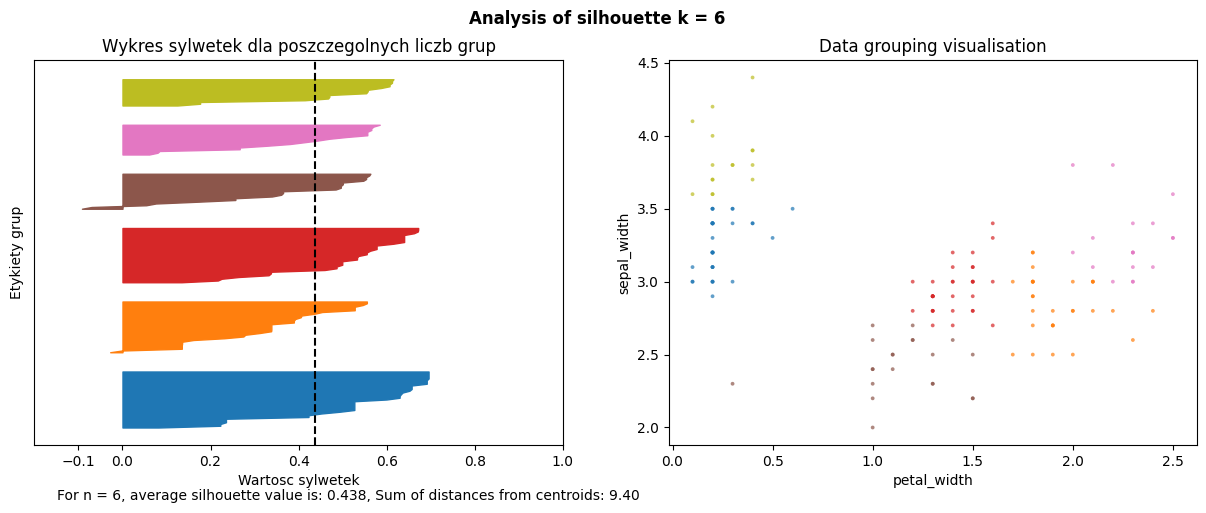

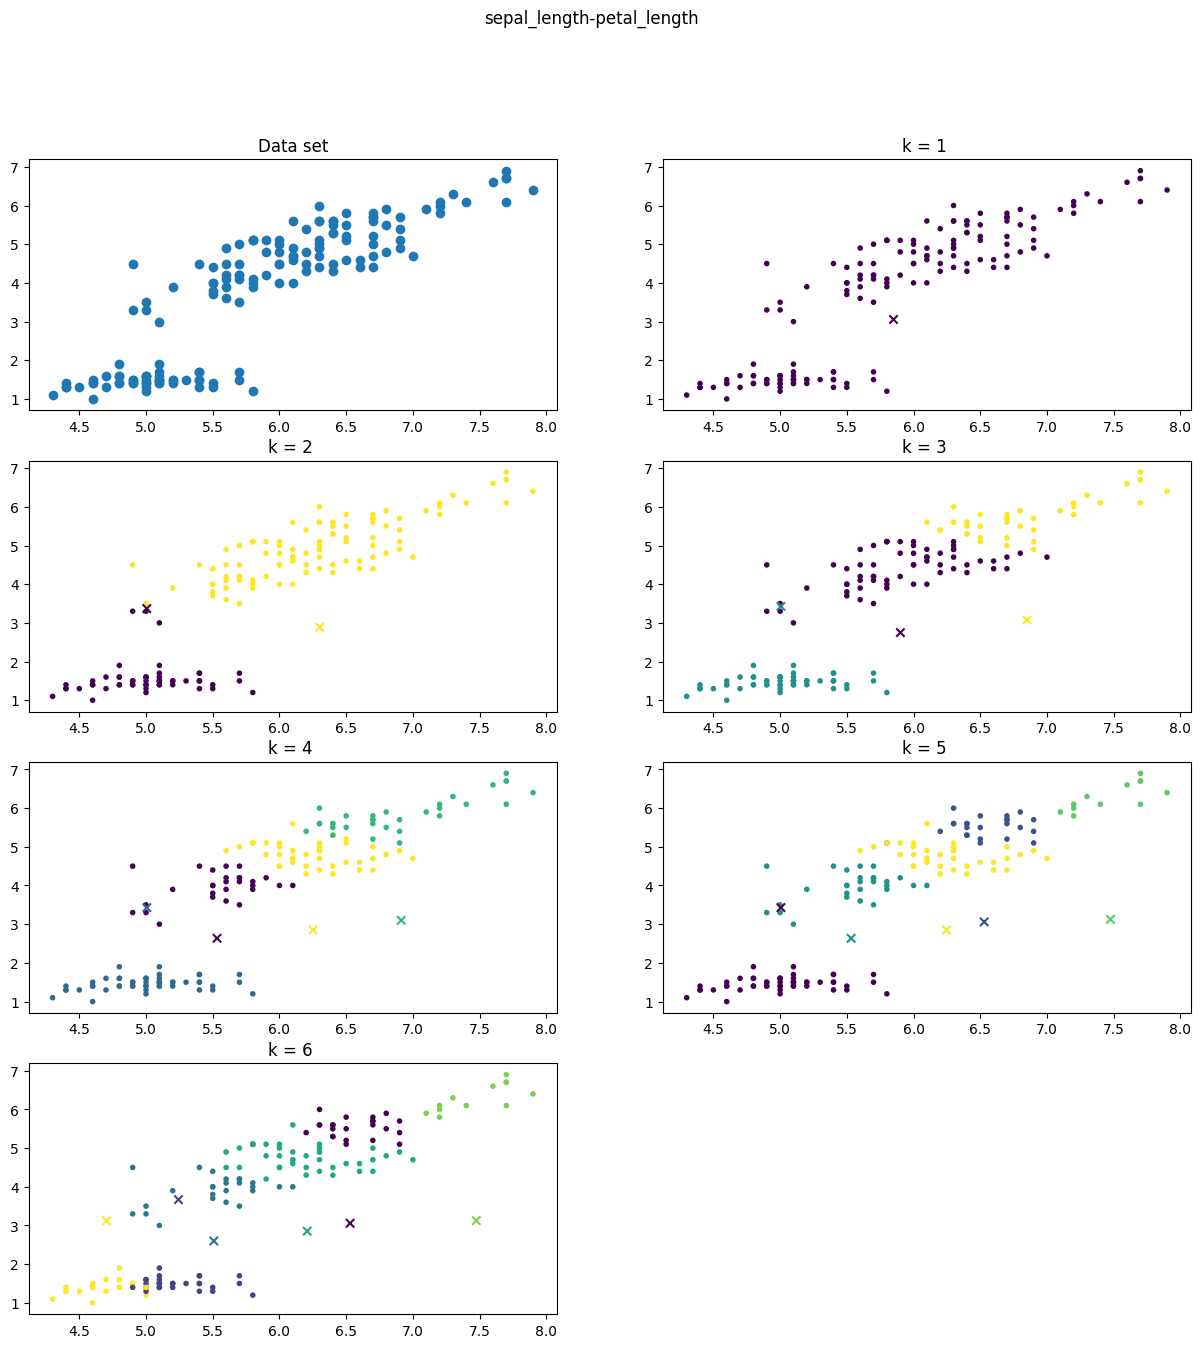

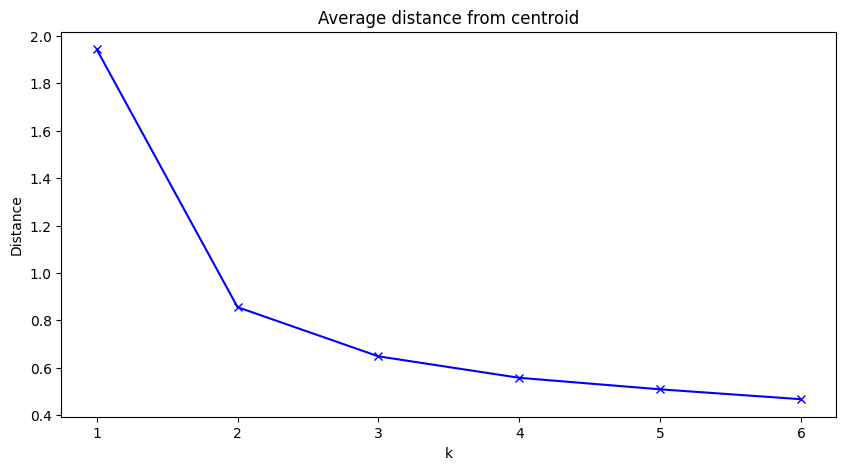

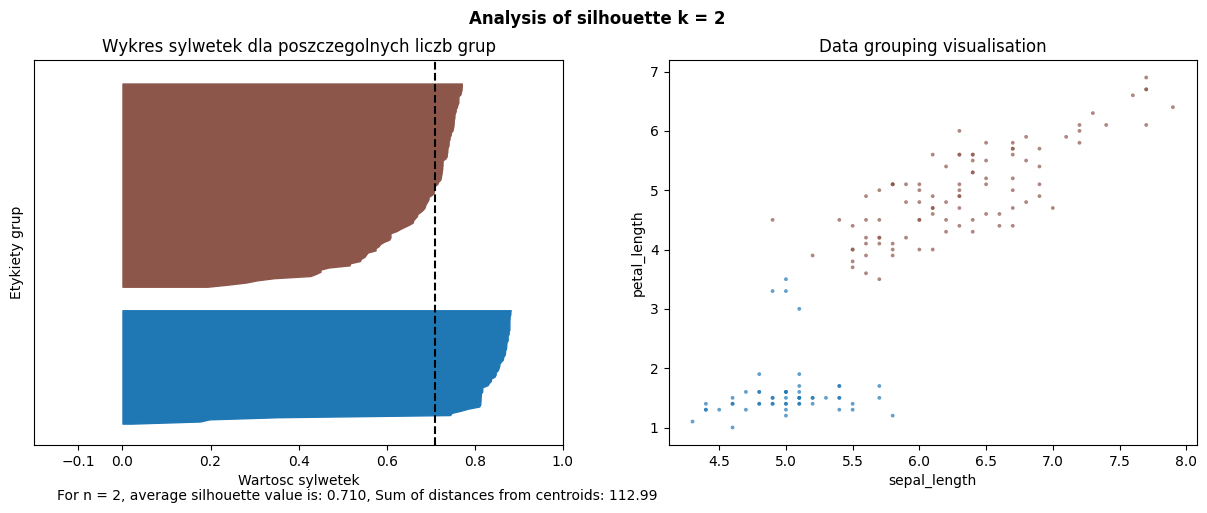

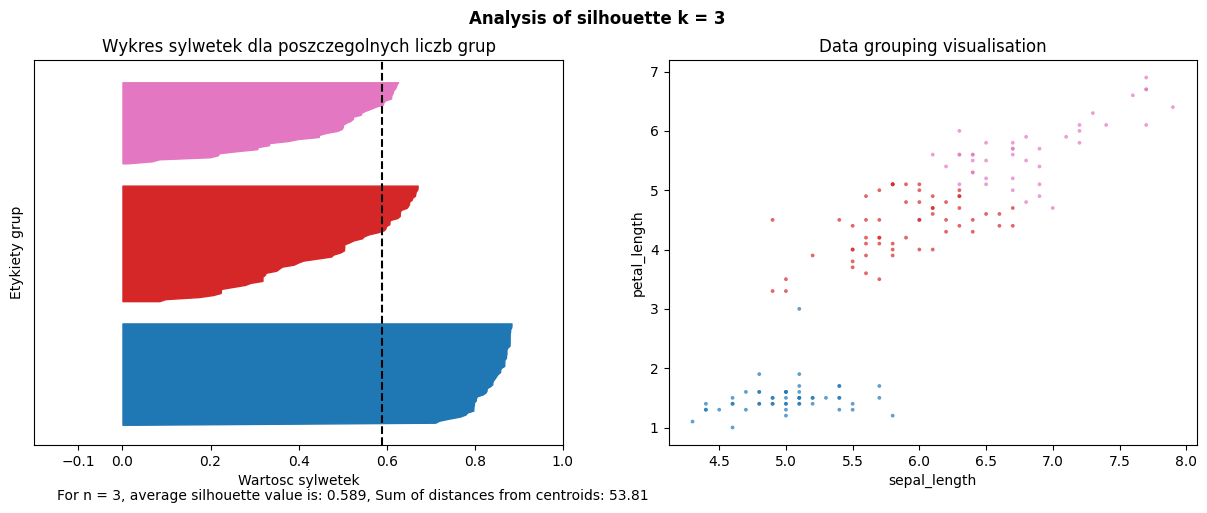

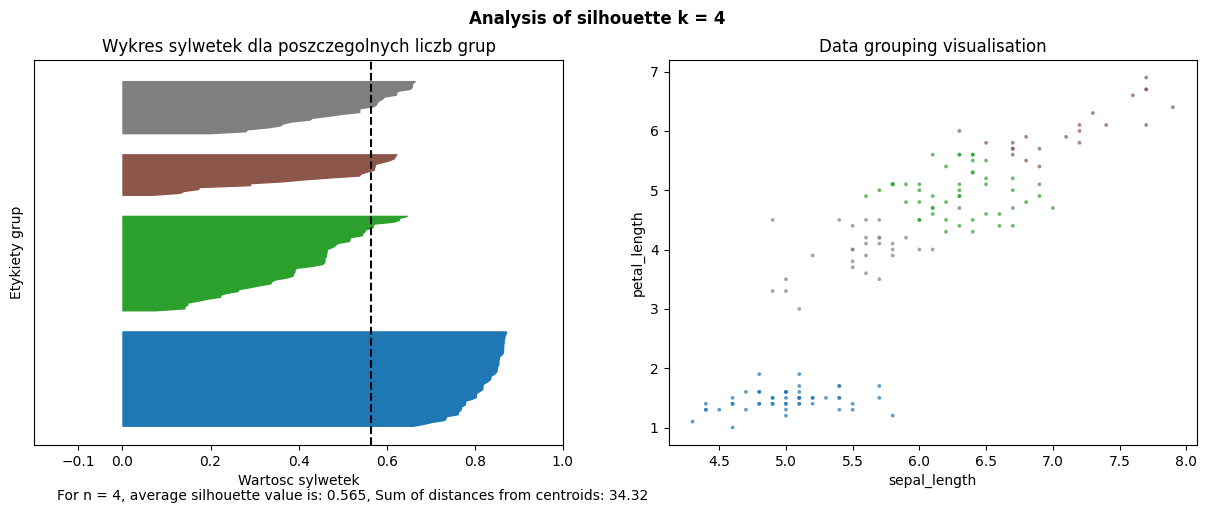

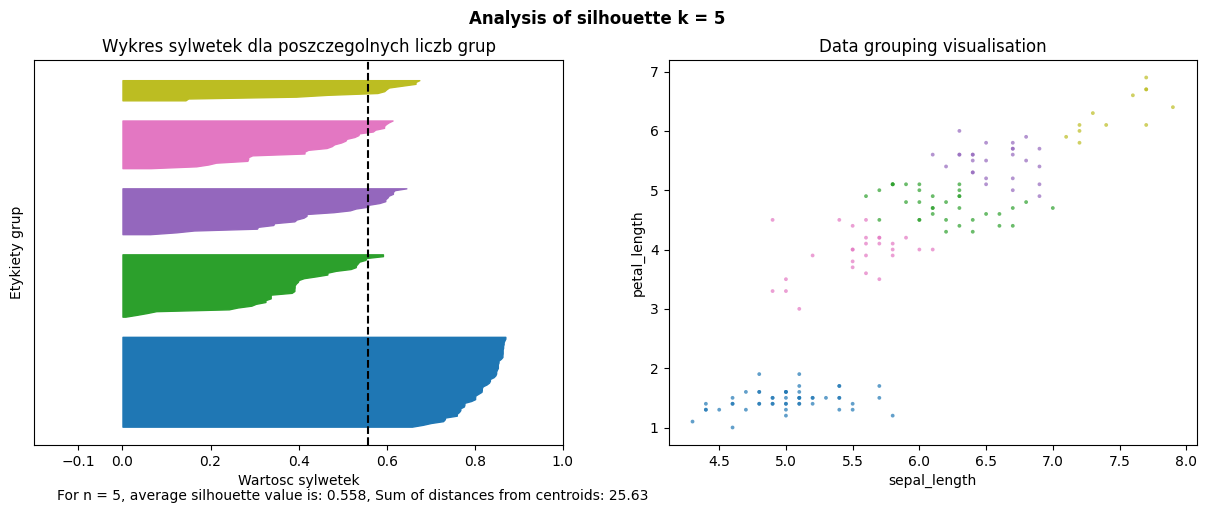

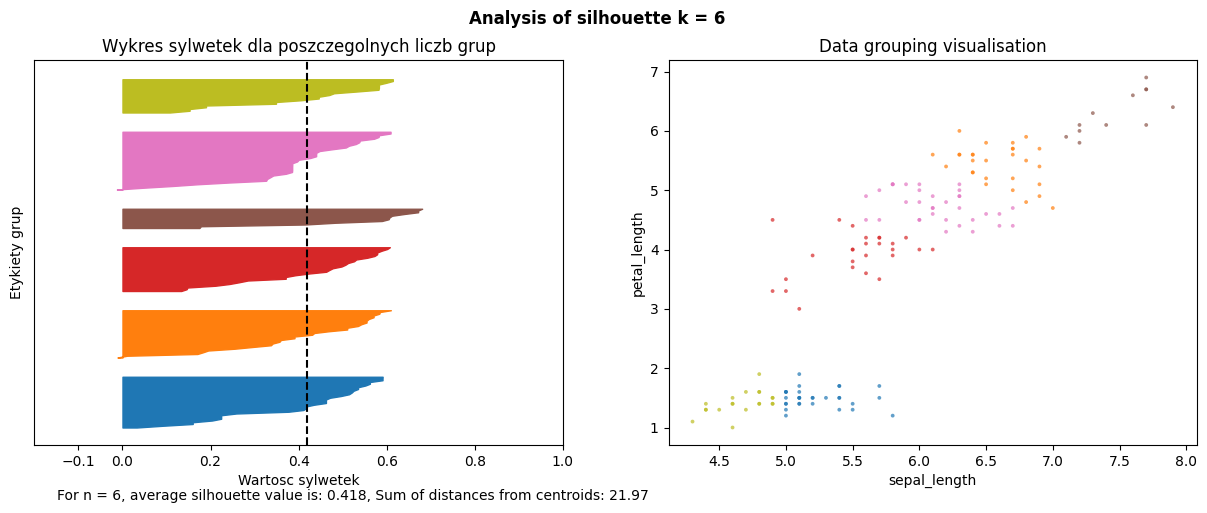

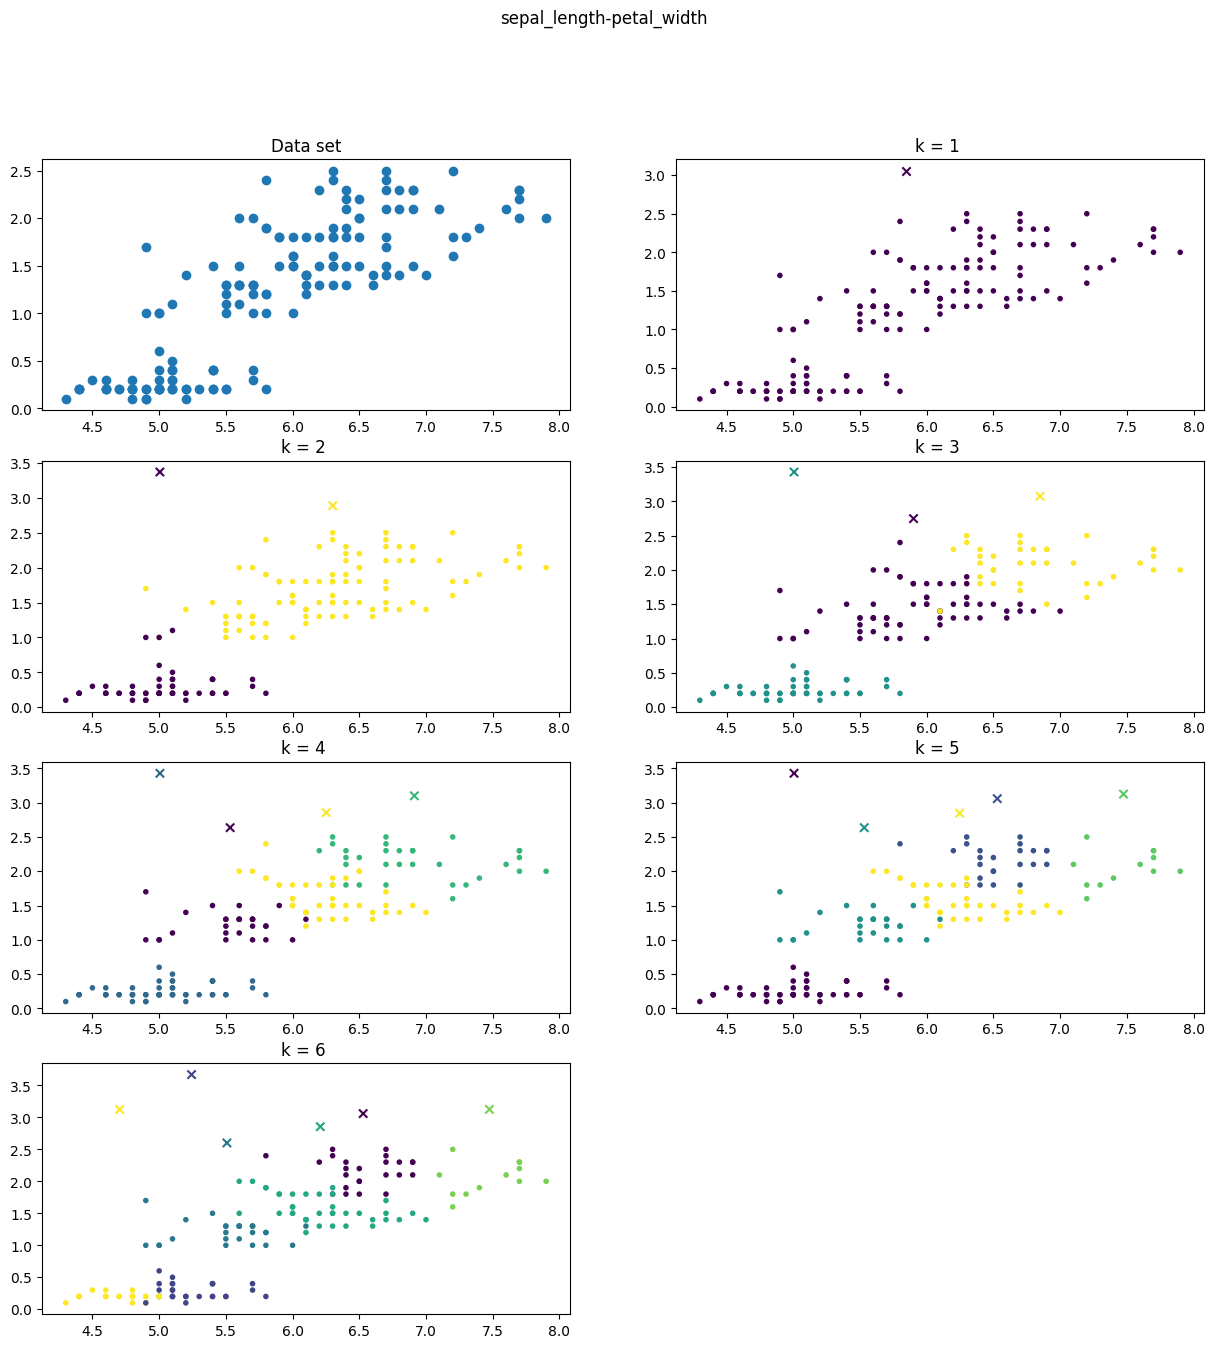

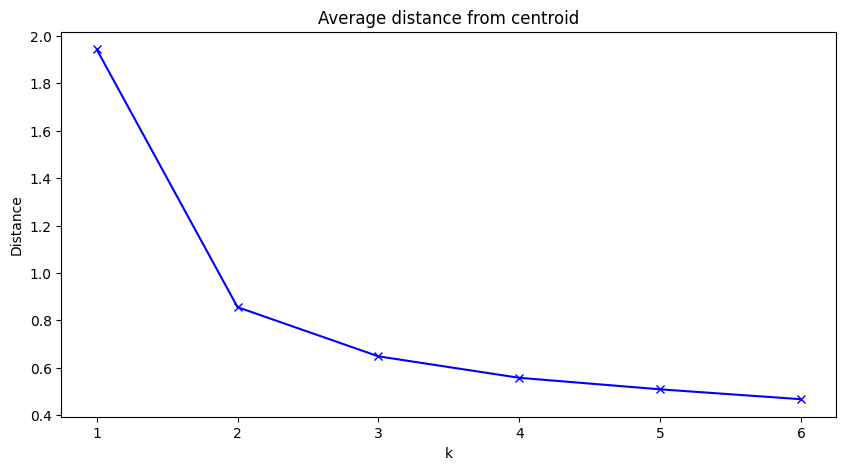

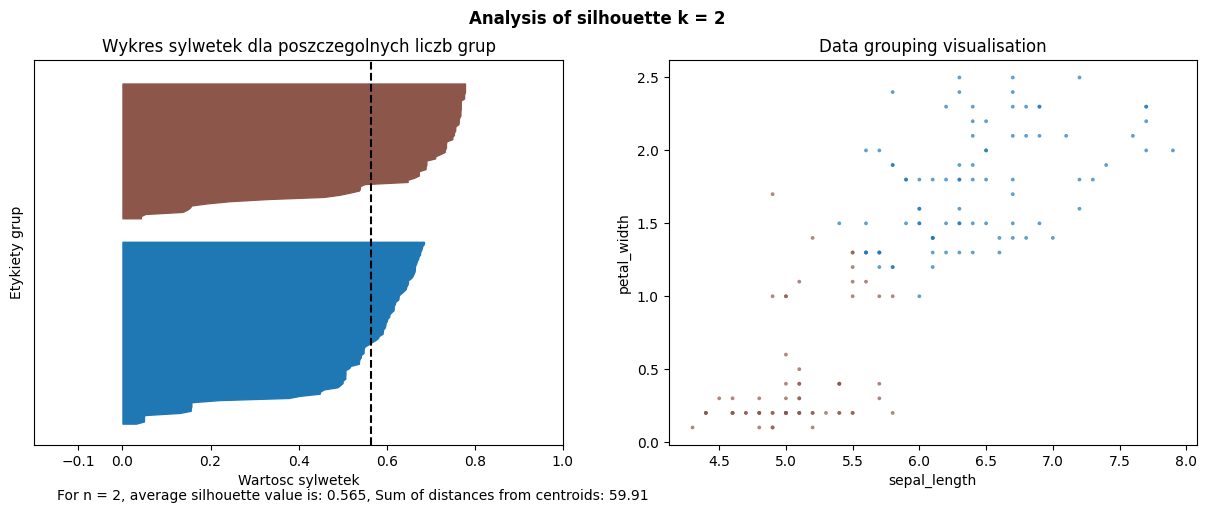

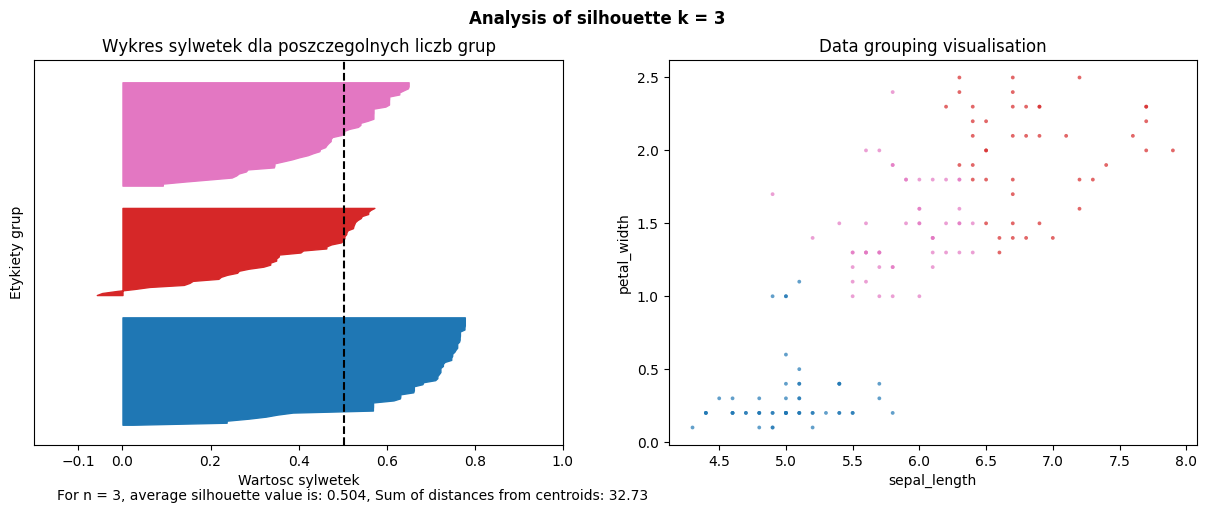

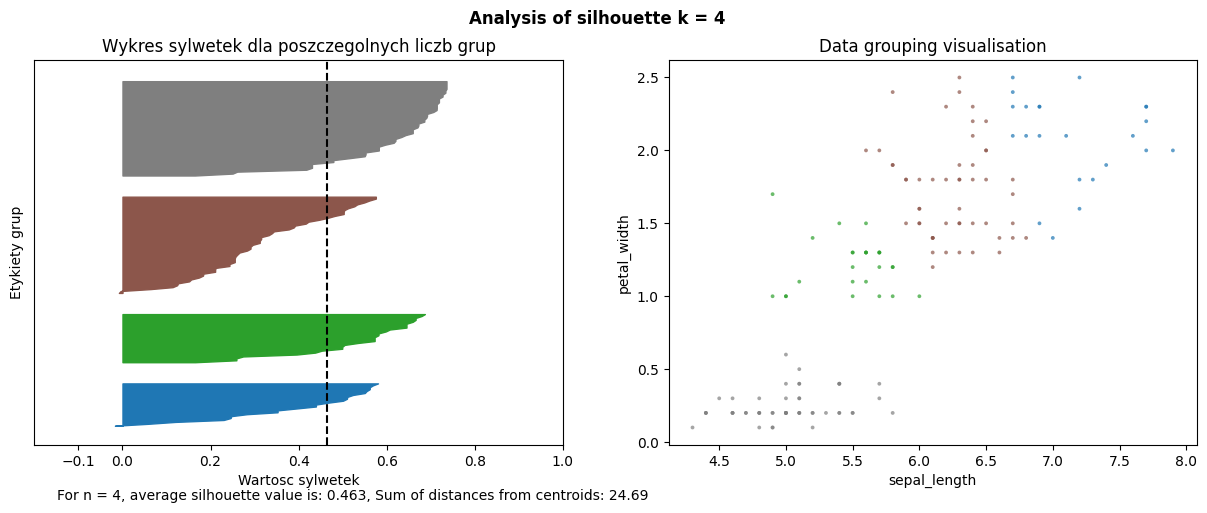

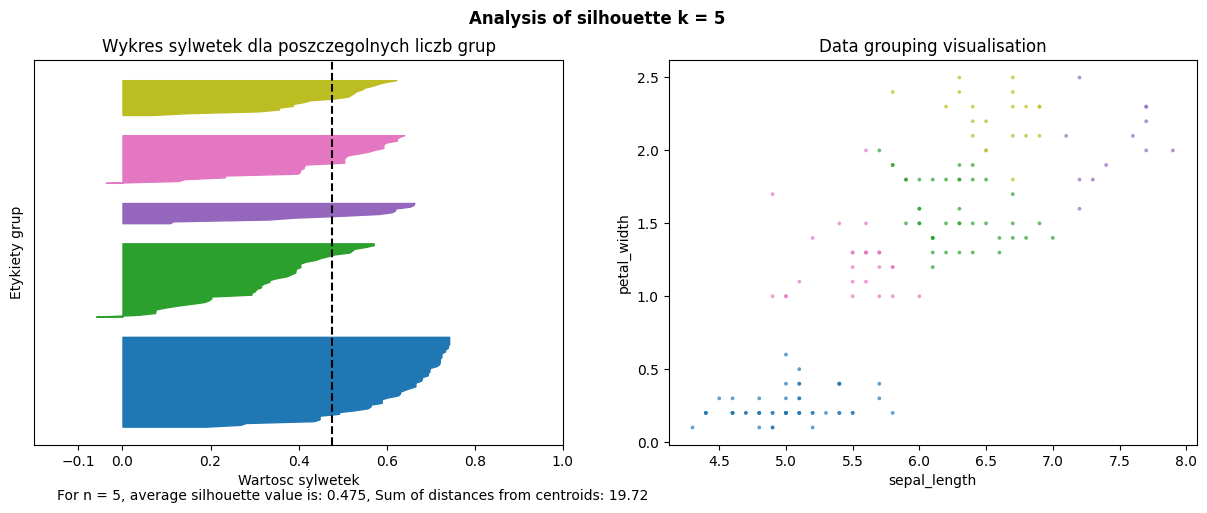

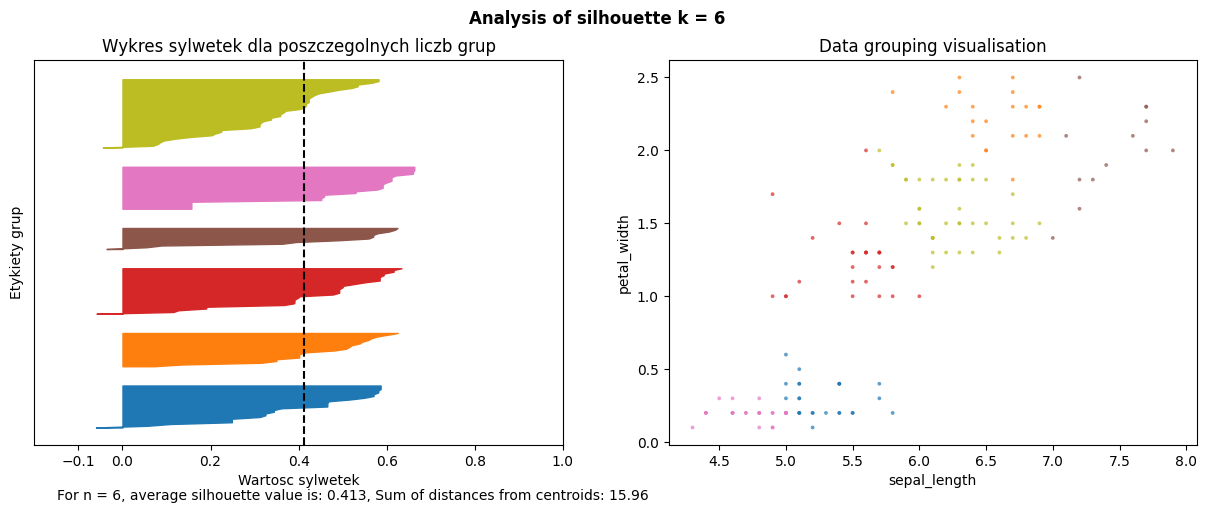

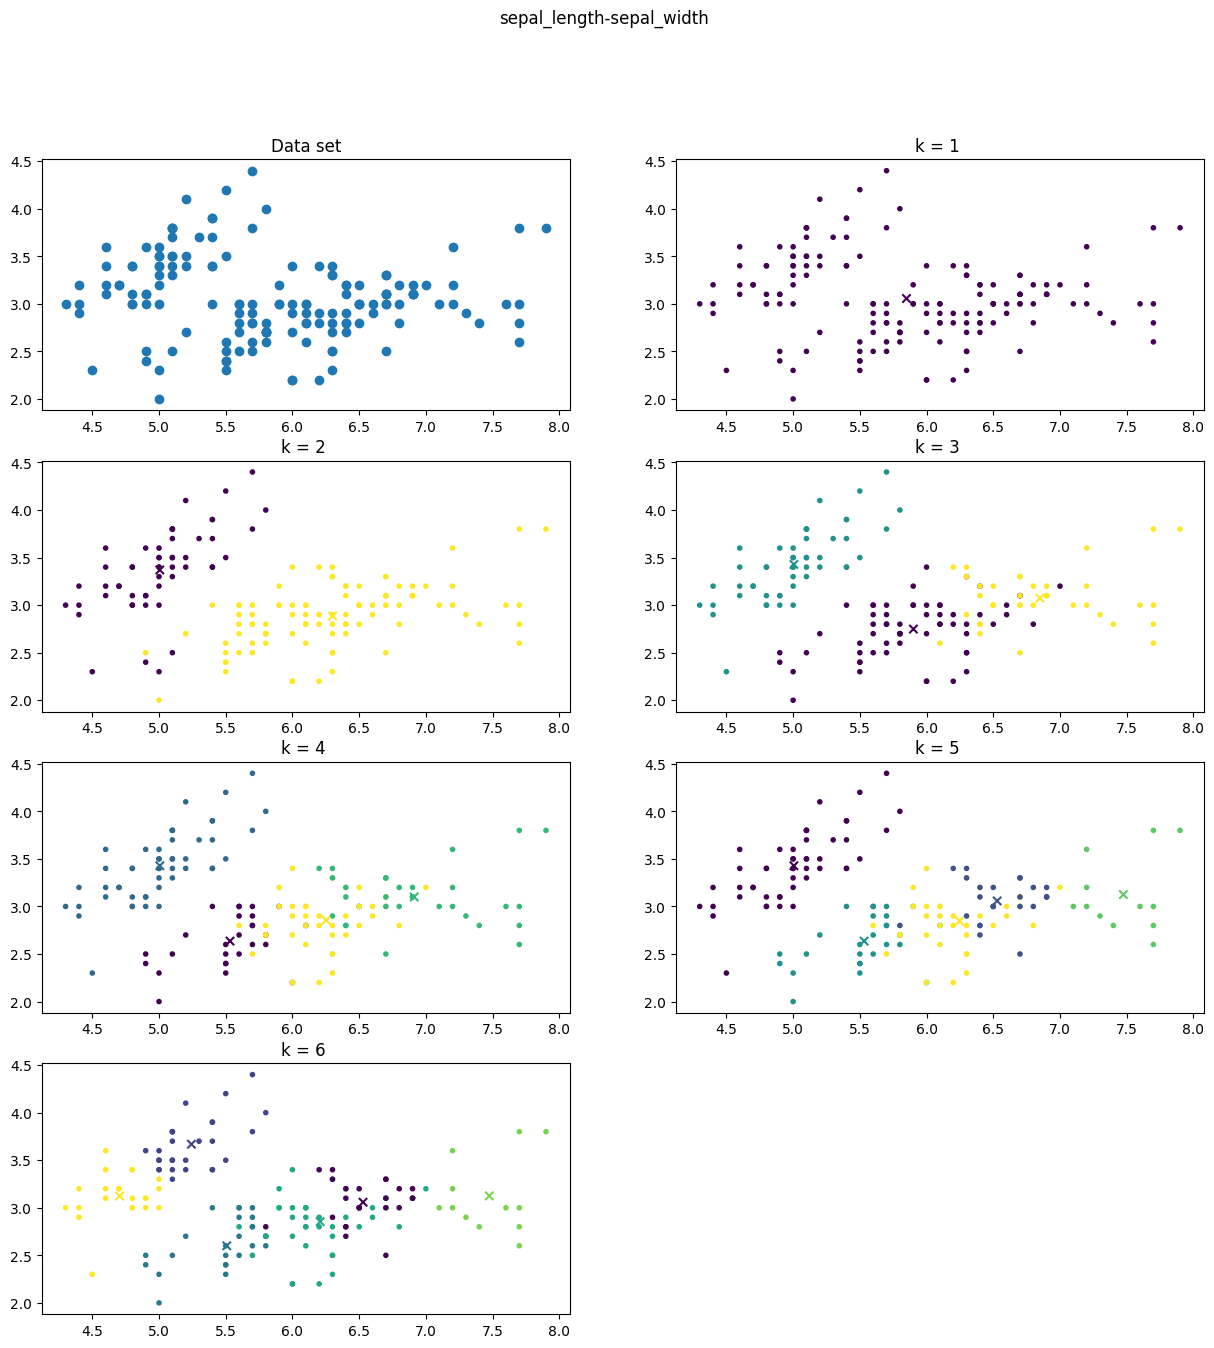

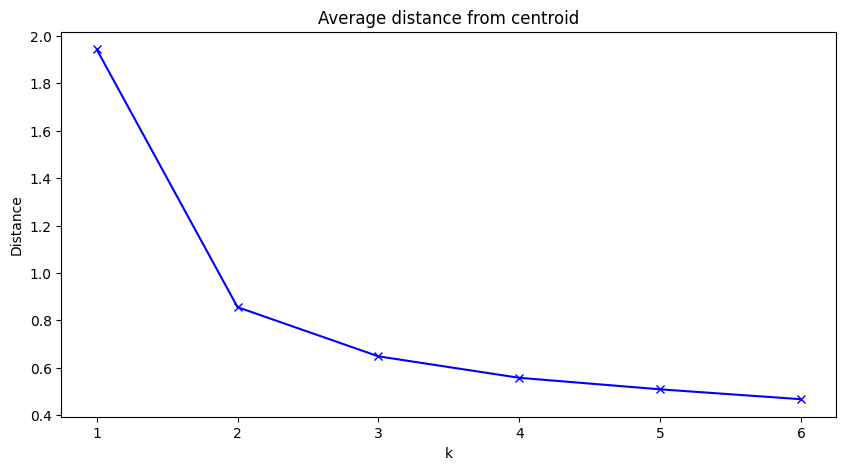

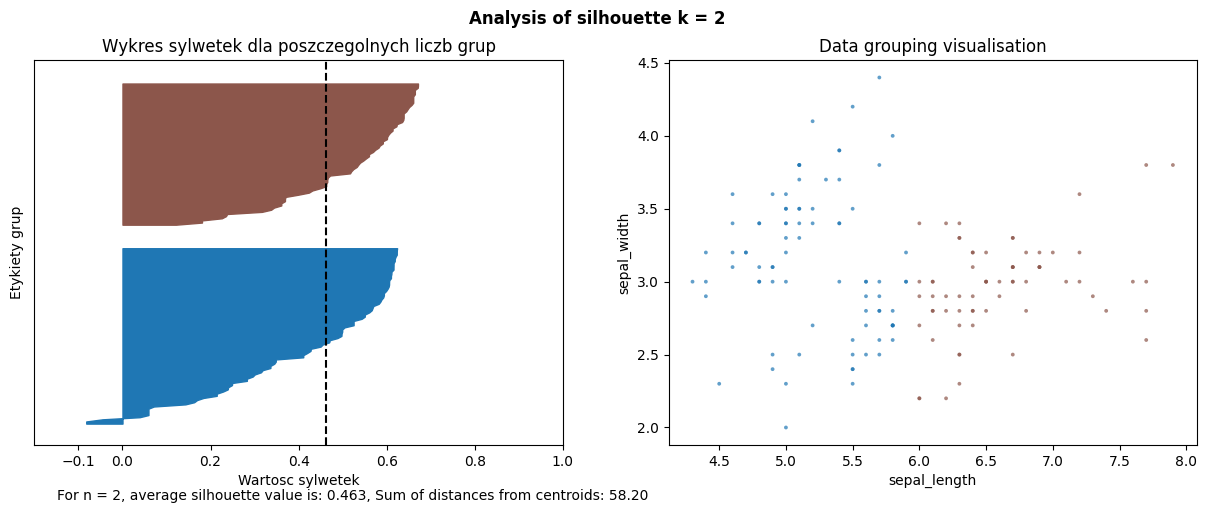

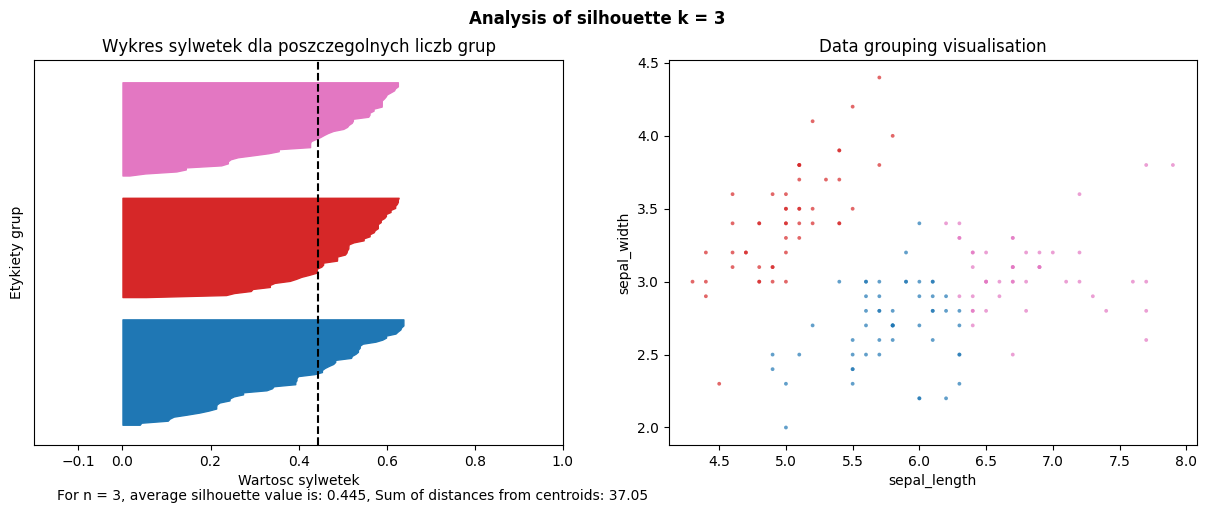

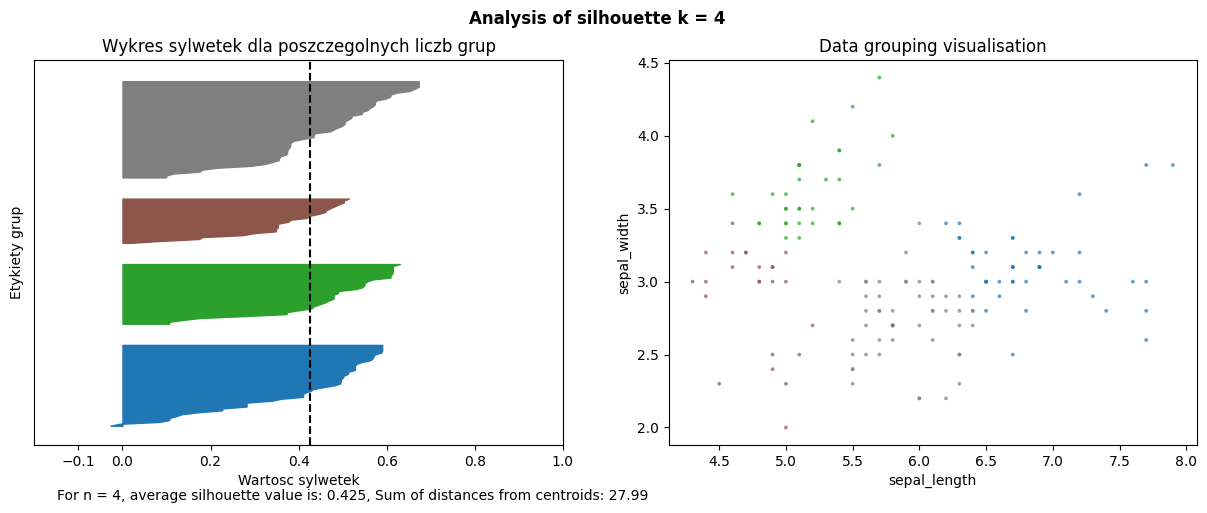

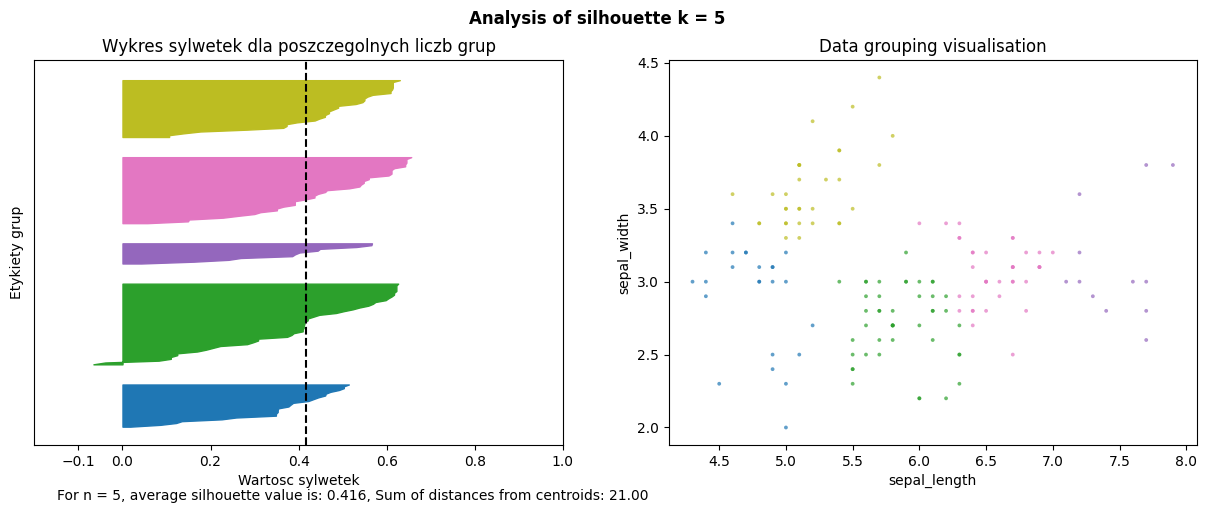

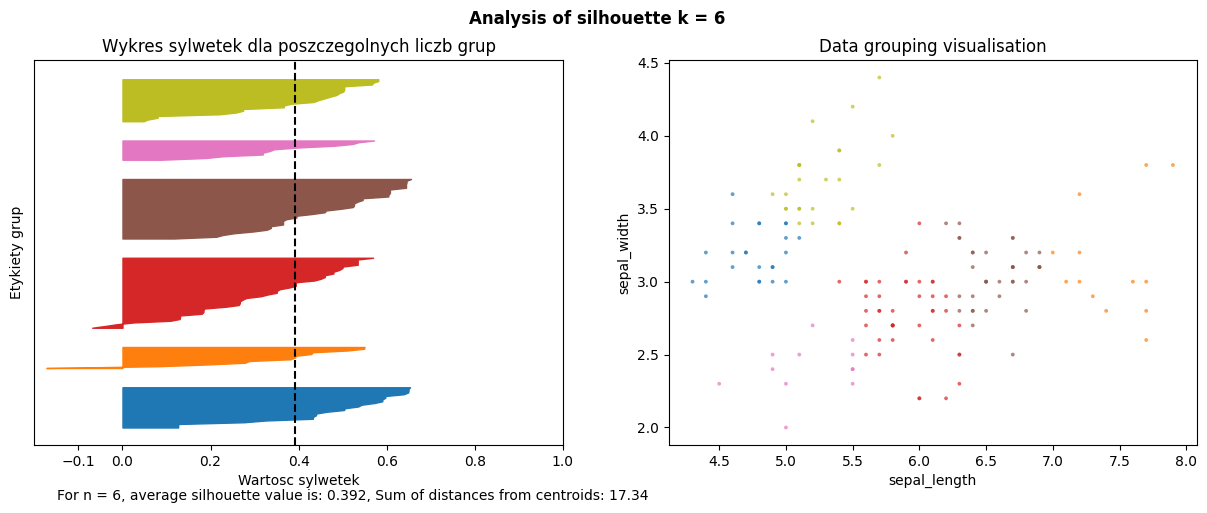

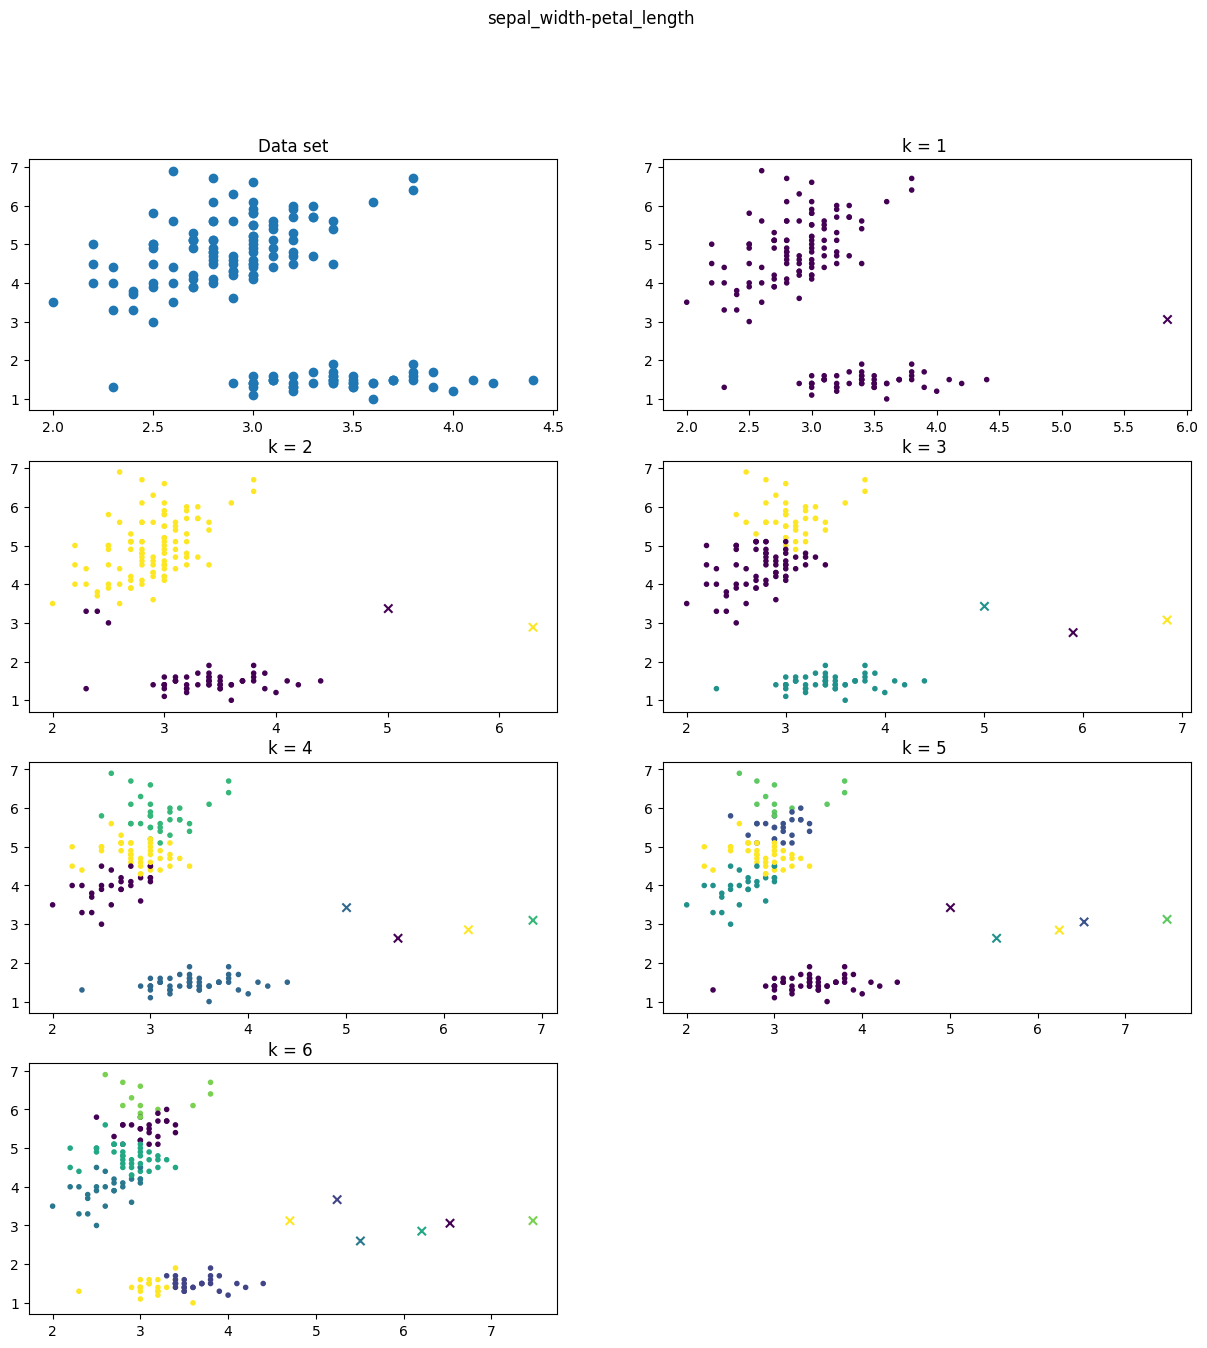

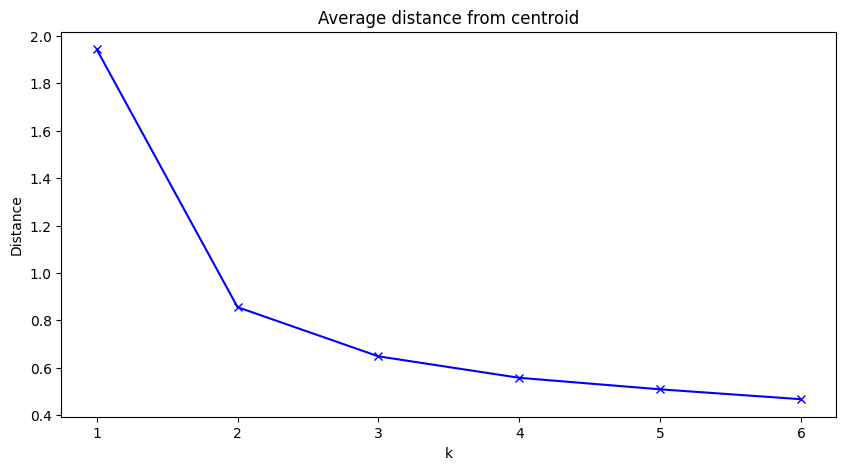

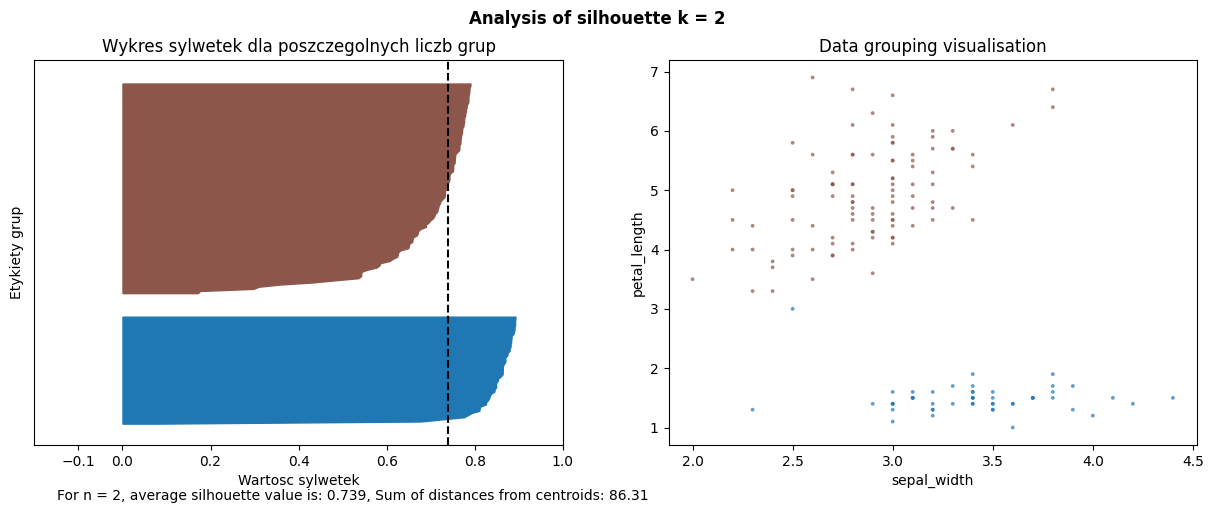

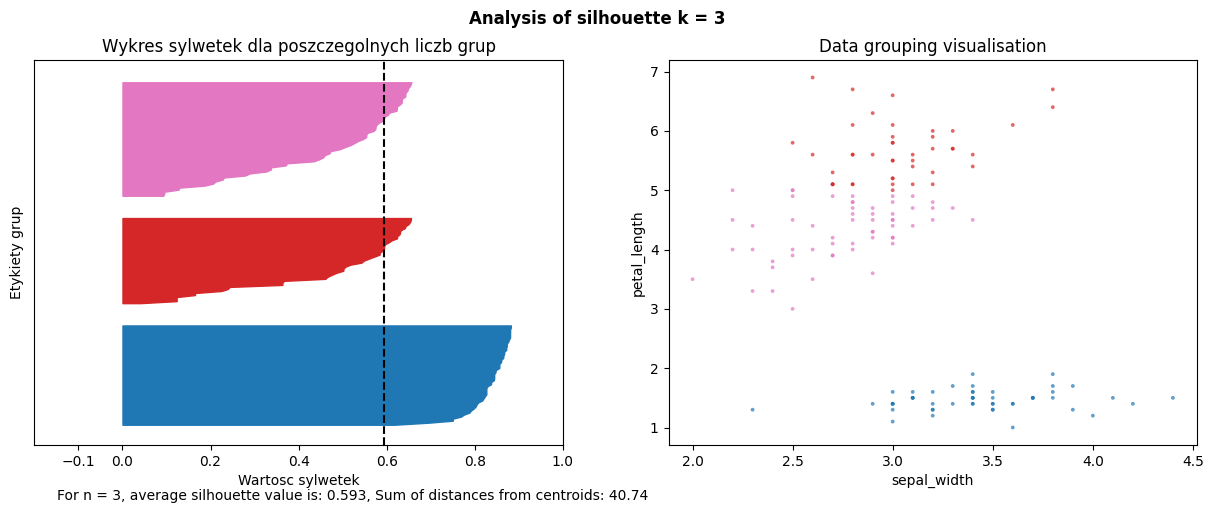

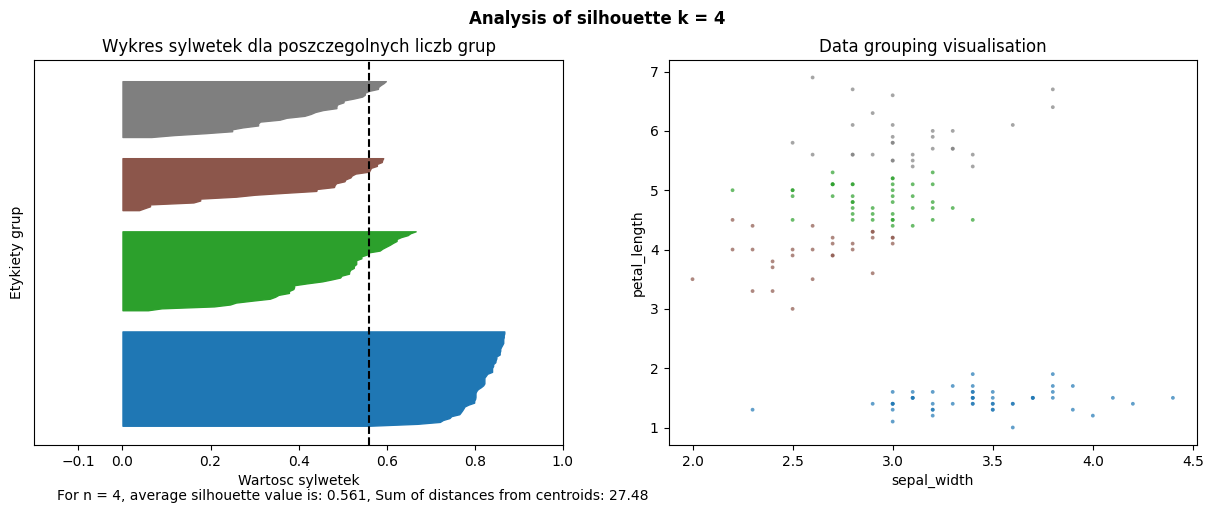

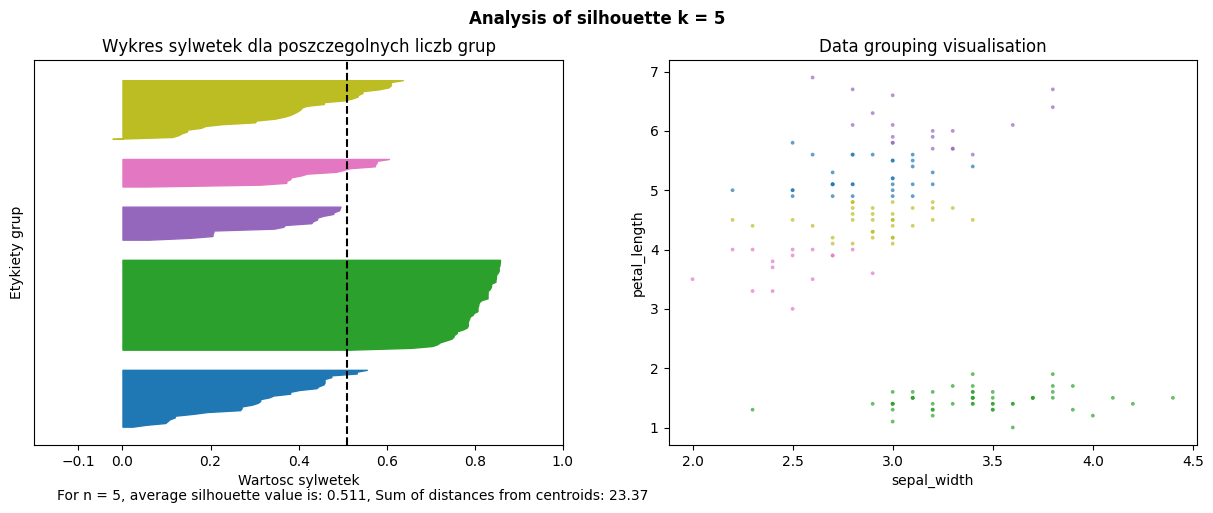

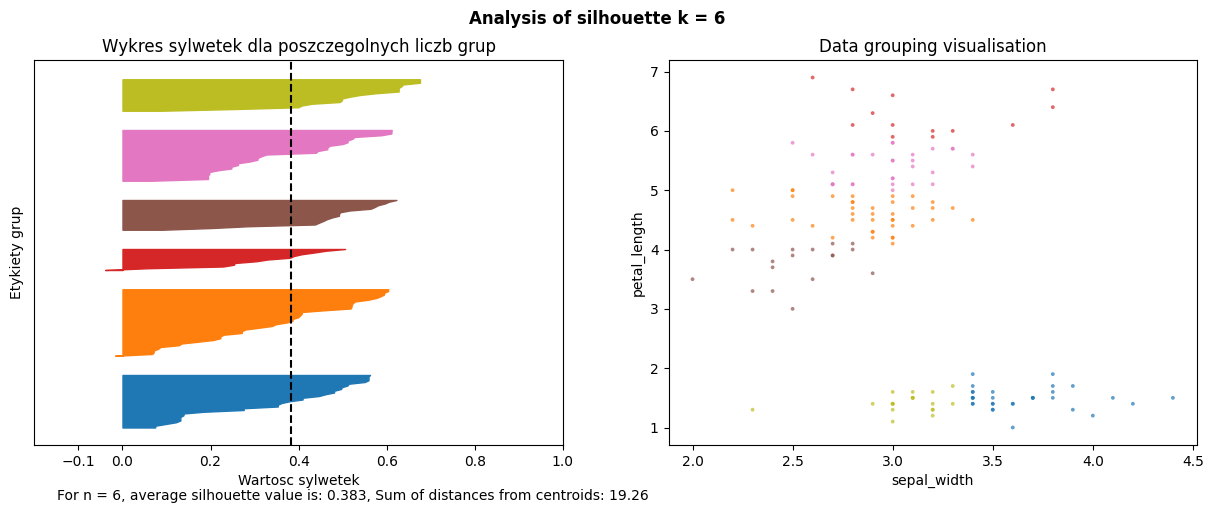

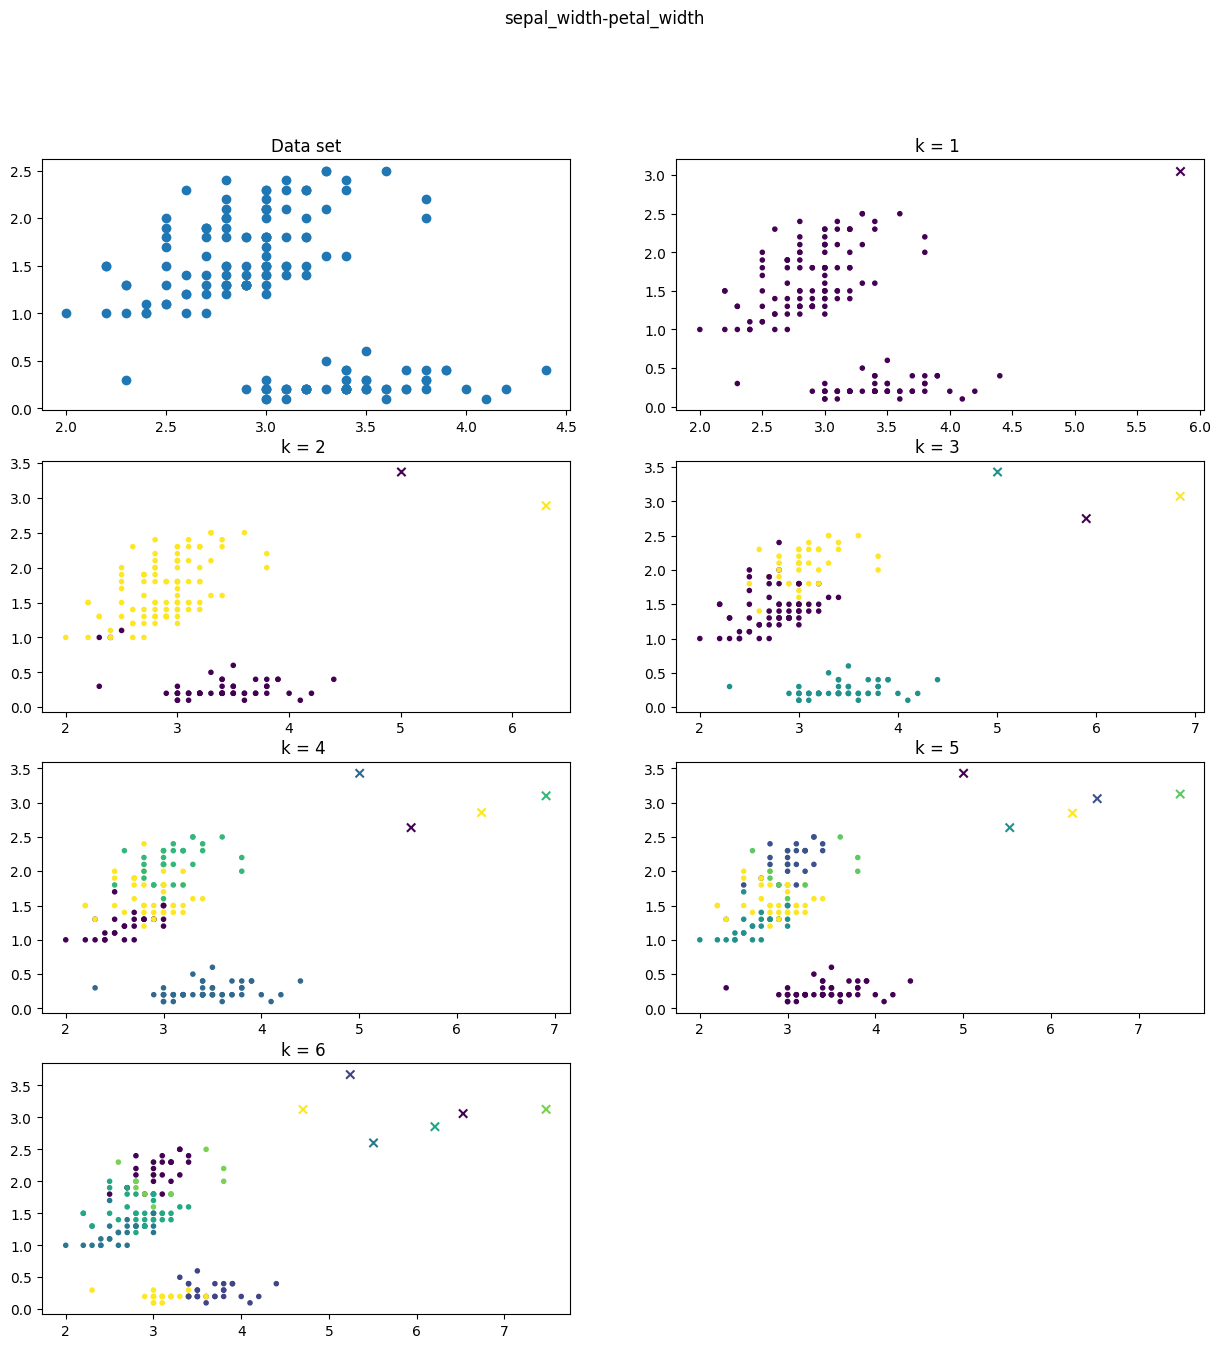

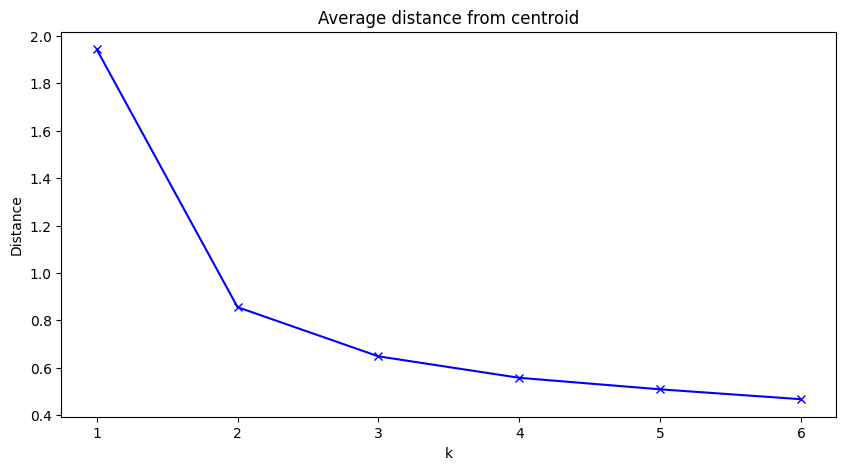

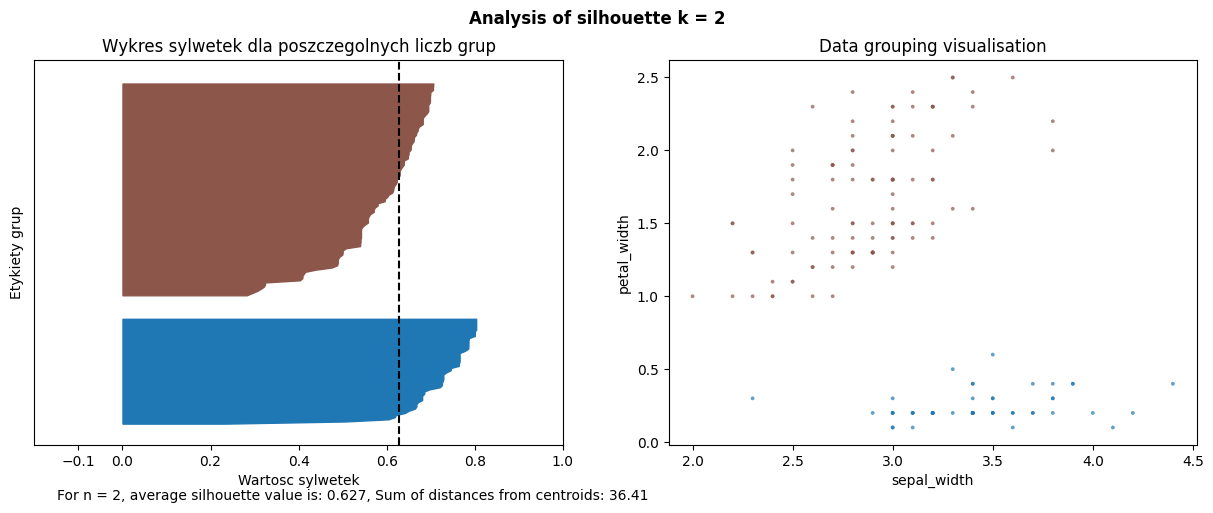

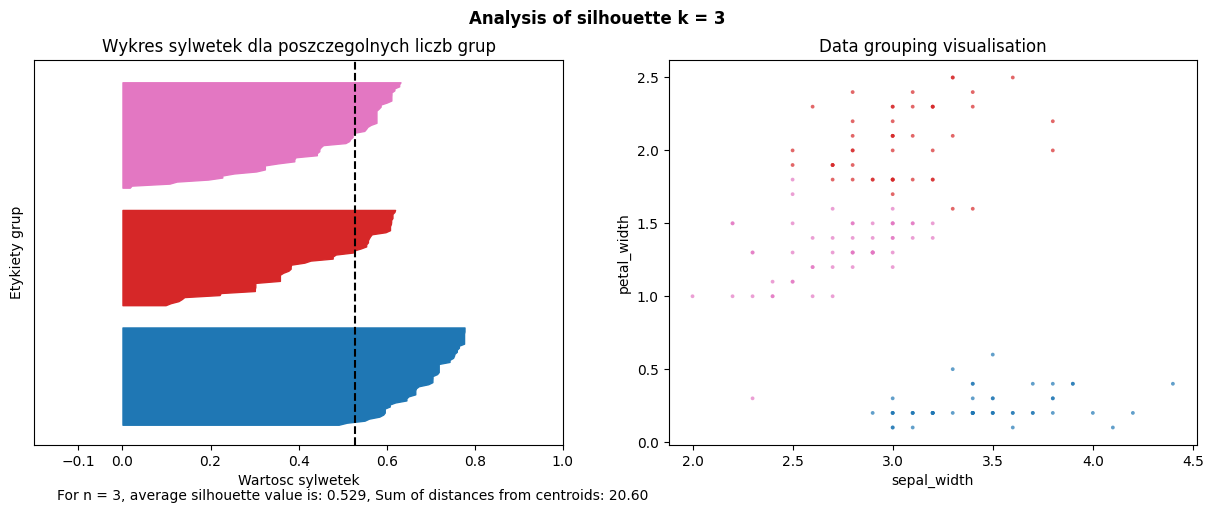

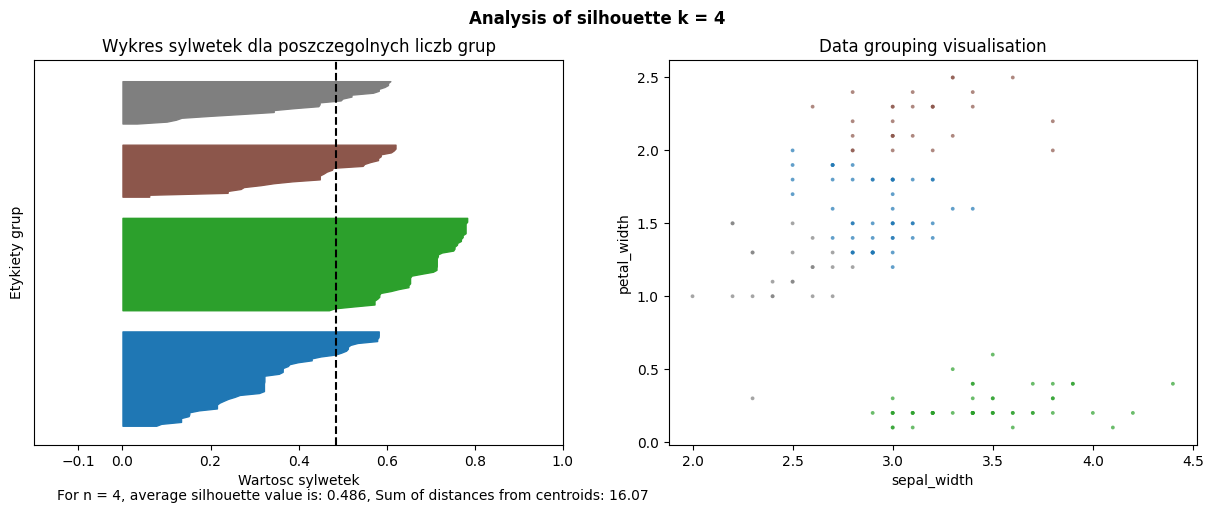

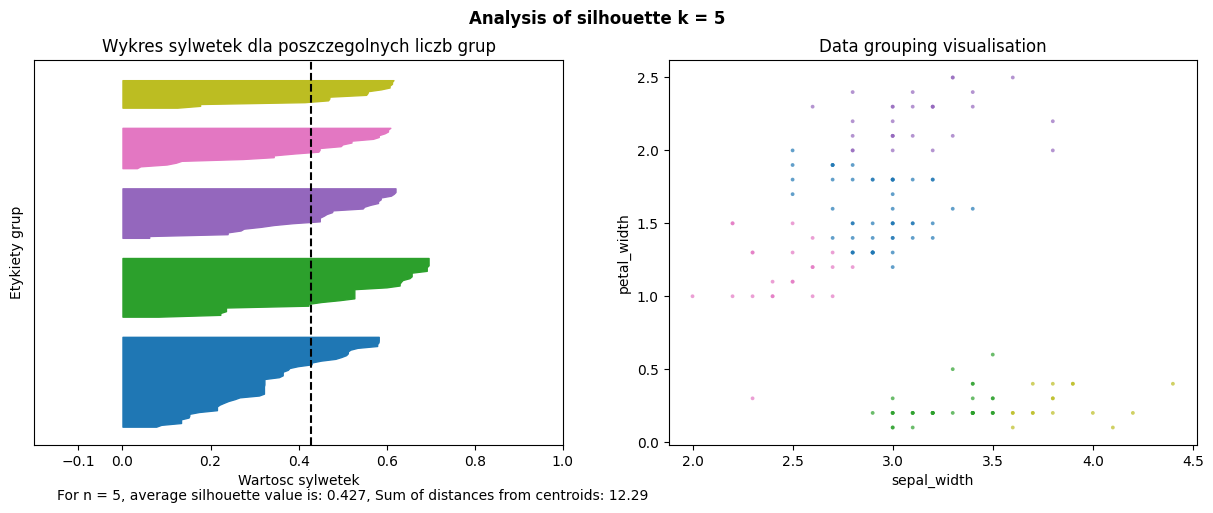

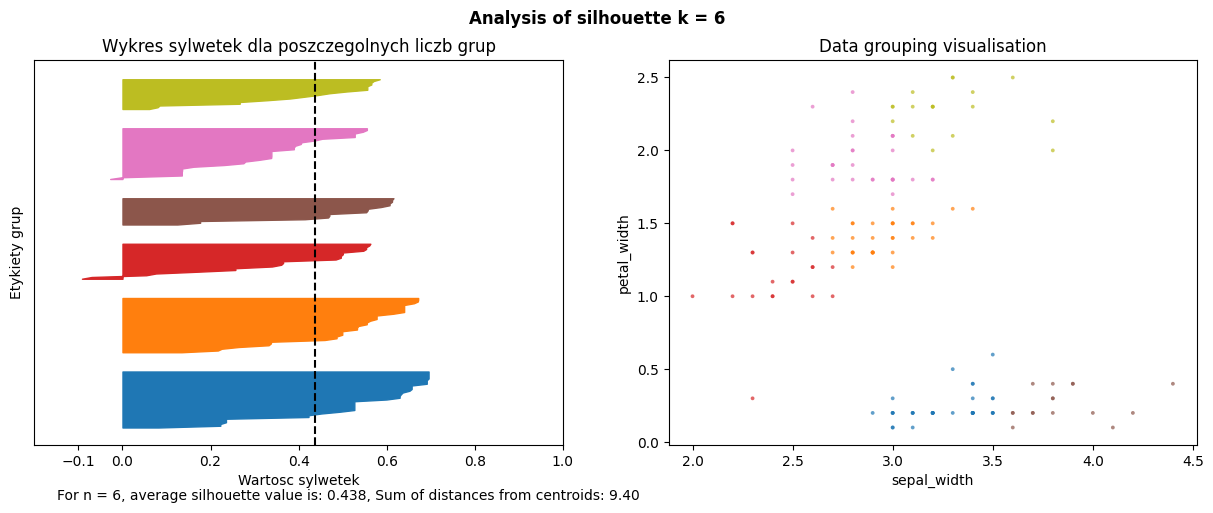

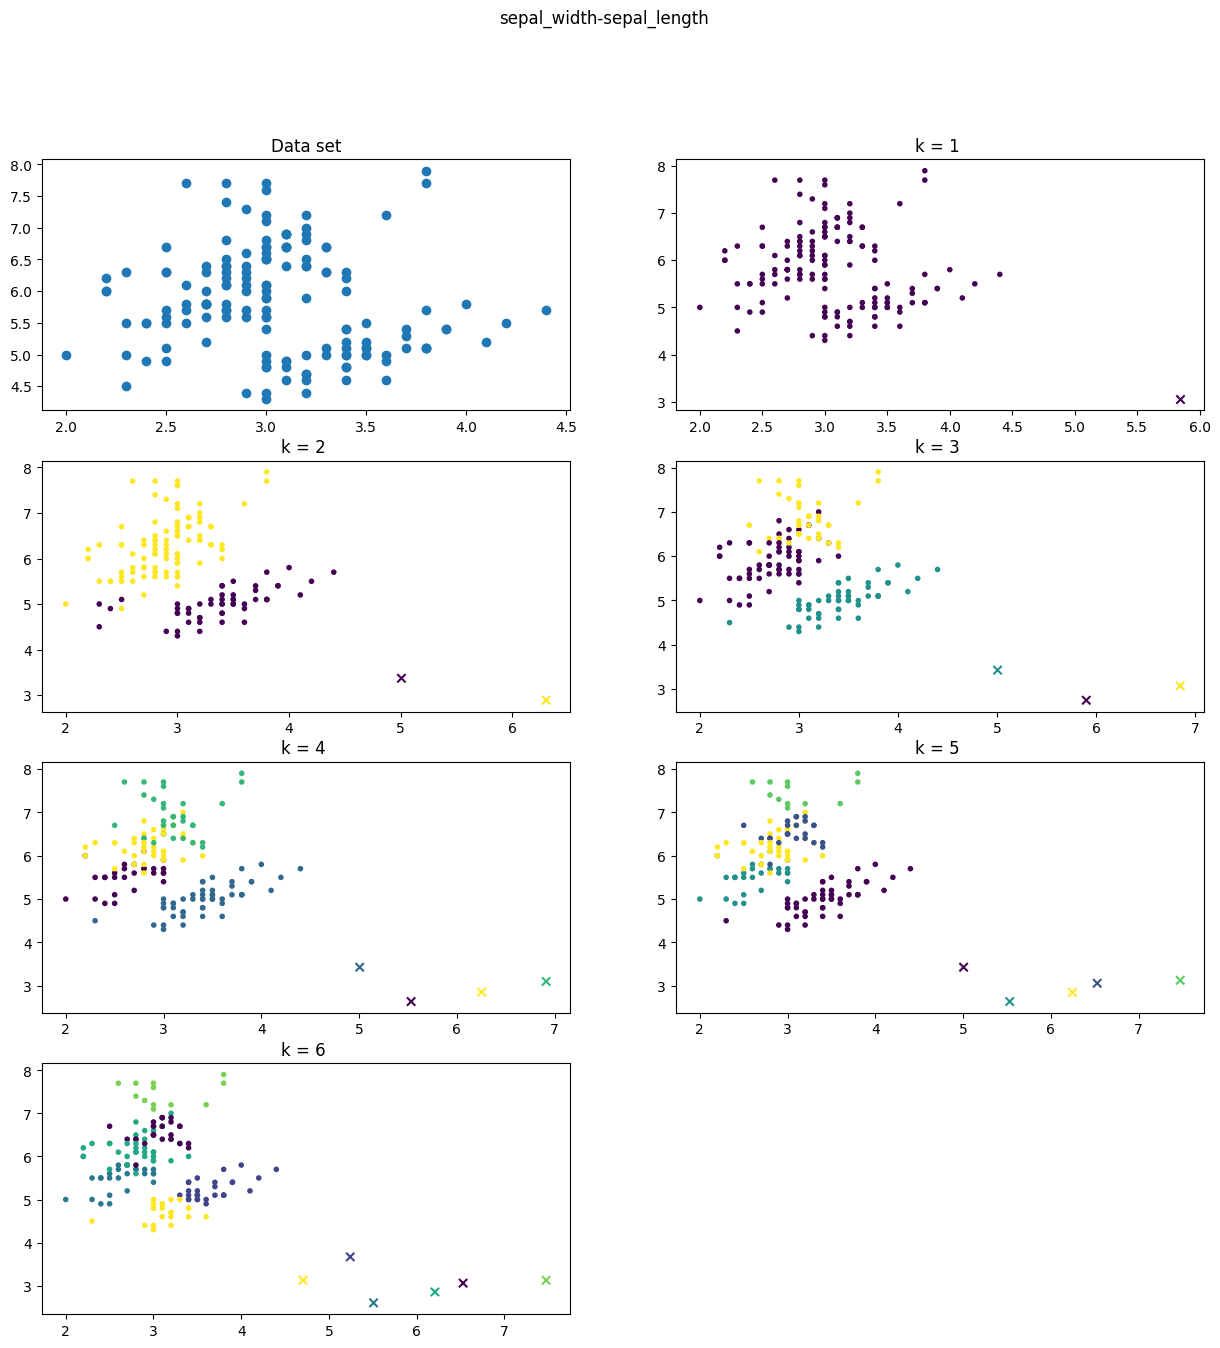

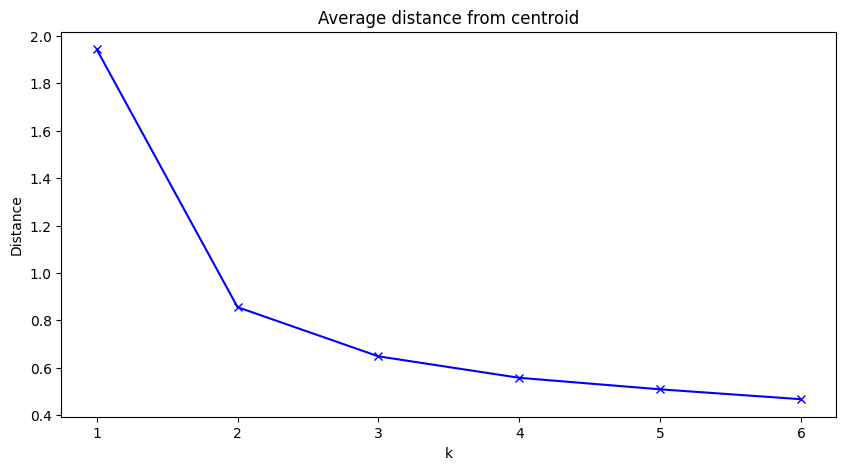

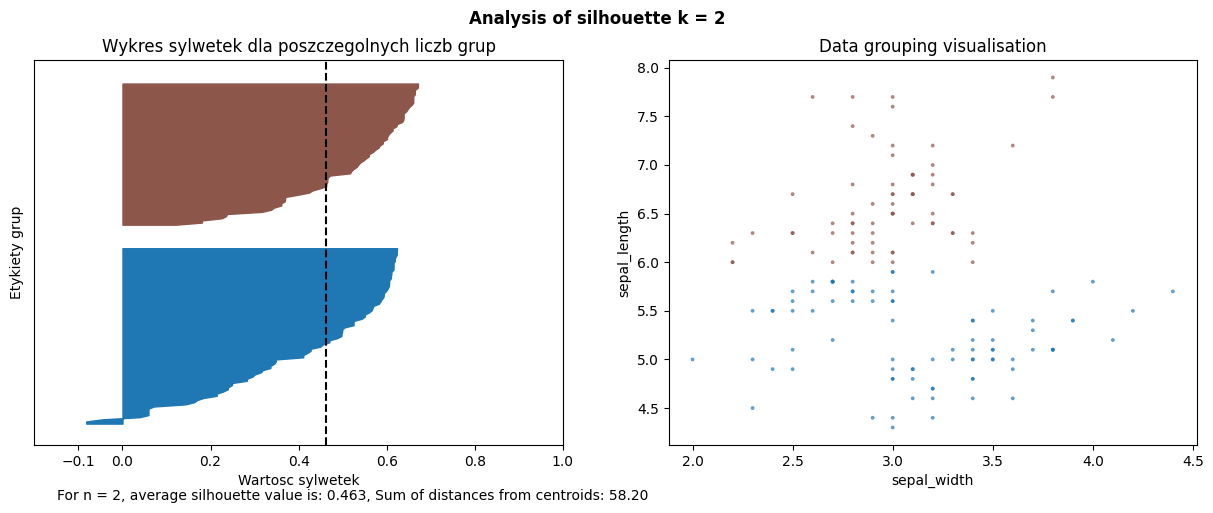

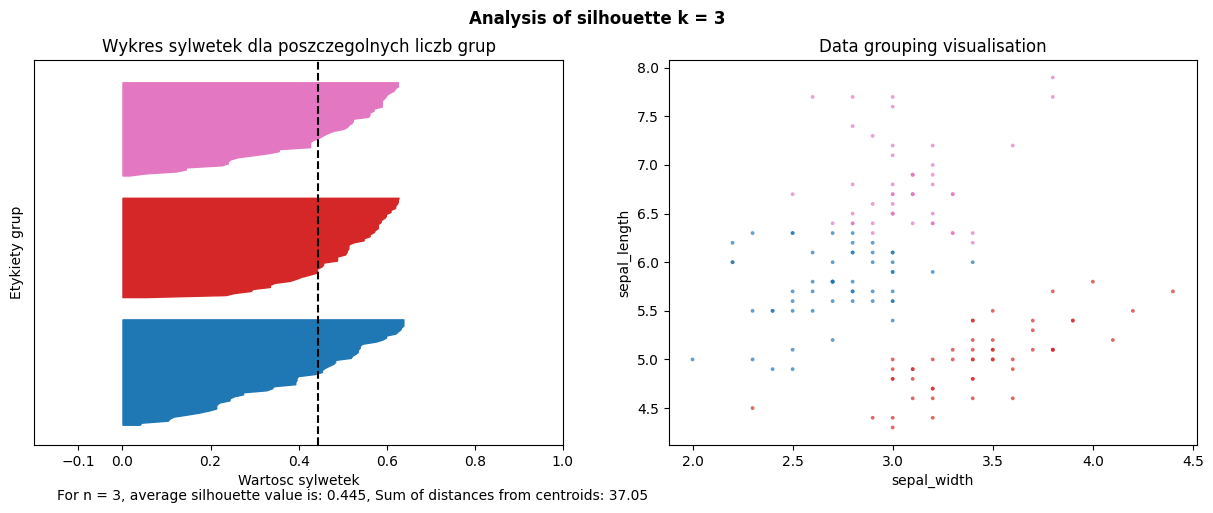

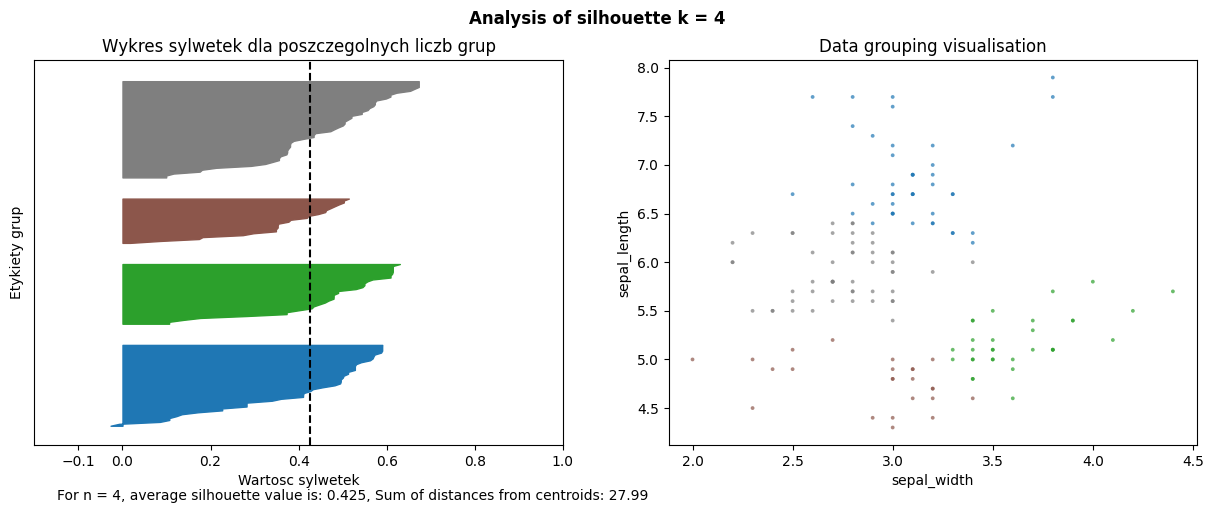

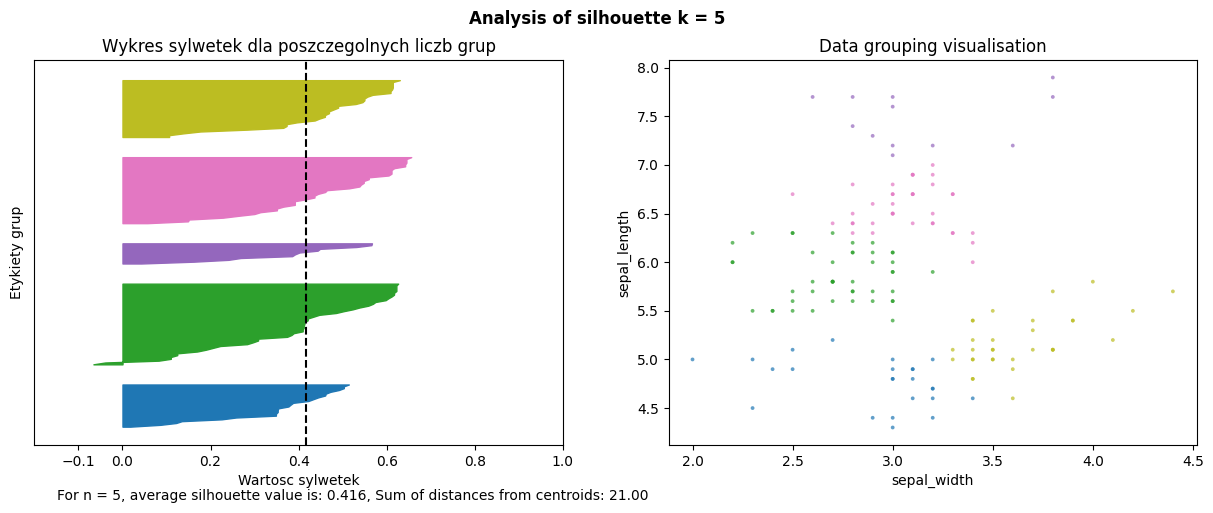

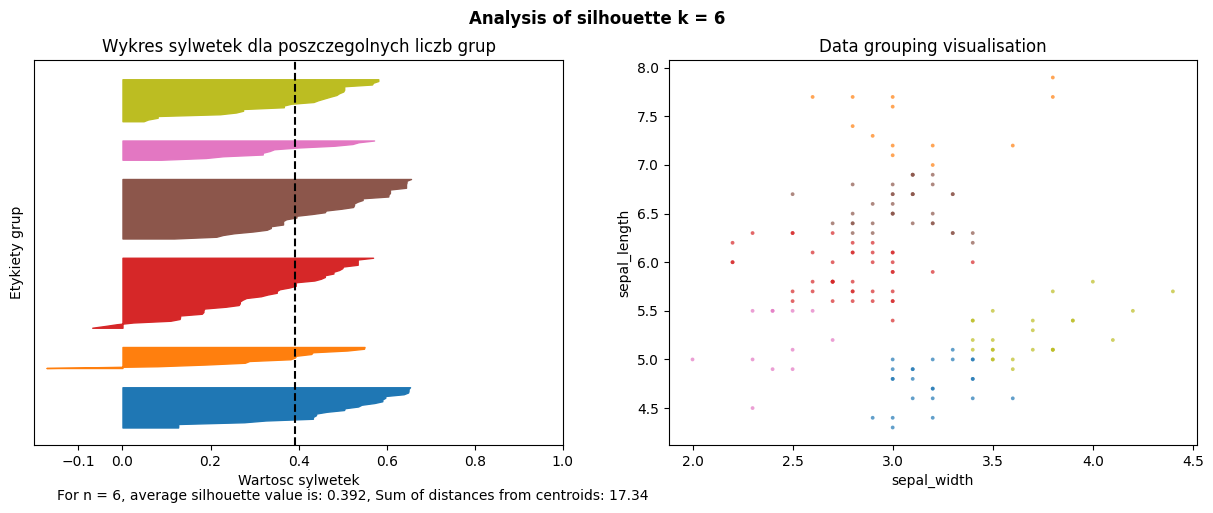

In [2]:
iris_org = pd.read_csv("iris.csv", usecols = range(1, 6))
iris = iris_org.drop(columns = 'species')

import warnings
warnings.filterwarnings("ignore")

attr=["petal_length","petal_width","sepal_length","sepal_width"]

for atr1 in attr:
    for atr2 in attr:
        if(atr1==atr2):
            continue
        max_k = 6
        range_k = range(1, max_k)
        nvertical = int(max_k / 2) + 1
        fig = plt.figure(figsize = (15, 15))
        fig.suptitle(atr1+"-"+atr2)
        plt.subplot(nvertical, 2, 1)
        plt.scatter(iris[atr1], iris[atr2])
        plt.title('Data set')
        avg_dist = []
        pos = 2
        for k in range(1, max_k + 1):
            plt.subplot(nvertical, 2, pos)
            pos += 1
            kmeans = KMeans(n_clusters = k, random_state = 0)
            kmeans.fit(iris)
            cluster_labels = kmeans.fit_predict(iris)
            plt.scatter(iris[atr1], iris[atr2], marker='.', c = cluster_labels)
            centroids = kmeans.cluster_centers_
            plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', c = np.array(range(k)))
            plt.title('k = %s ' % k)
            avg_dist.append(sum(np.min(cdist(iris, centroids, 'euclidean'), axis = 1)) / iris.shape[0]) 

        plt.figure(figsize = (10, 5))
        plt.plot(range(1, max_k + 1), avg_dist, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Distance')
        plt.title('Average distance from centroid')

        group_numbers = [2, 3, 4, 5, 6]
        quality = pd.Series(dtype = float)

        for ngroups in group_numbers :
            fig, (ax1, ax2) = plt.subplots(1, 2)
            fig.set_size_inches(15, 5)

            ax1.set_xlim([-0.2, 1])
            ax1.set_ylim([0, len(iris) + (ngroups + 1) * 10])

            kmeans = KMeans(n_clusters = ngroups, random_state = 0).fit(iris)
            quality = quality.append(pd.Series(kmeans.inertia_))
            group_labels = kmeans.fit_predict(iris[[atr1,atr2]])

            silhouette = silhouette_samples(iris[[atr1,atr2]], group_labels)   
            average_silhouette = silhouette_score(iris[[atr1,atr2]], group_labels)

            line_pos = 10
            for i in range(ngroups):
                silhouette_in_group = silhouette[group_labels == i]
                silhouette_in_group.sort()

                liczebnosc_grupy = silhouette_in_group.shape[0]
                color = cm.tab10(float(i) / ngroups)
                ax1.fill_betweenx(np.arange(line_pos, line_pos + liczebnosc_grupy), 0, silhouette_in_group, color = color)

                line_pos += liczebnosc_grupy + 10

            ax1.set_title("Wykres sylwetek dla poszczegolnych liczb grup")
            ax1.set_xlabel("Wartosc sylwetek")
            ax1.set_ylabel("Etykiety grup")

            ax1.axvline(x = average_silhouette, color = 'black', linestyle = '--')
            ax1.set_yticks([])
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

            colory = cm.tab10(group_labels.astype(float) / ngroups)
            ax2.scatter(iris[atr1], iris[atr2], marker = '.', s = 30, lw = 0, alpha = 0.7,c = colory)

            ax2.set_title('Data grouping visualisation')
            ax2.set_xlabel(atr1)
            ax2.set_ylabel(atr2)

            plt.suptitle(('Analysis of silhouette k = %d' % ngroups),  fontweight = 'bold')
            plt.figtext(0.14, 0, ('For n = %d, average silhouette value is: %.3f, Sum of distances from centroids: %.2f'
                % (ngroups, average_silhouette, kmeans.inertia_ ) ))

#         plt.plot(group_numbers, quality,'bo-')
#         plt.title('Elbow plot', fontsize = 14, fontweight = 'bold')
#         plt.xlabel('Number of groups')
#         plt.ylabel('Sum of distances from centroids')

Wnioski z analizy wyników:
* Wykresy sylwetki i lokcia w wiekszosci sugeruja liczbe grup = 3.
* Często mozna wziąść również pod uwagę podział na dwie grupy patrzac tylko na wykresy metody sylwetki, jednak  wtedy wykres metody lokciowej obala taki podzial na dwie grupy.  
* Przy większej lości grup dane zostaję podzielone nadmiernie.
* Bez względu na dobór atrybutów, srednia wartosc sylwetki i wykres metody lokciowej jest dla podzialu na trzy grupy taki sam lub bardzo zblizony. Przy wiekszych wartosciach grup widac duza zmiennosc w sredniej wartosci sylwetki 